### Baseline models (accuracy)



*   Random Model
*   Majority Class Model
*   Harbringer Model
*   Bag of Words Model





#### Sender Model

In [11]:
import nltk
nltk.download('punkt')          # Tokenizer model
nltk.download('stopwords')      # Stopword list
nltk.download('wordnet')        # Lemmatizer
nltk.download('omw-1.4')        # WordNet data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Lowercasing, remove punctuation and special characters, tokenization, remove stopwords and lemmatization

In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Accuracy on baseline models

We will import the libraries

In [2]:
import json
import numpy as np
import random
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Loading the train, validation and test files

In [3]:
def load_jsonl(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            data.append(json.loads(line))
    return data

train_data = load_jsonl("train.jsonl")
val_data = load_jsonl("validation.jsonl")
test_data = load_jsonl("test.jsonl")

In [4]:
harbinger_words = {
    "claim": ["accordingly", "as a result", "consequently", "conclude that", "clearly", "demonstrates that", "entails", "follows that", "hence", "however", "implies", "in fact", "in my opinion", "in short", "in conclusion", "indicates that", "it follows that", "it is highly probable that", "it is my contention", "it should be clear that", "I believe", "I mean", "I think", "must be that", "on the contrary", "points to the conclusions", "proves that", "shows that", "so", "suggests that", "the most obvious explanation", "the point I'm trying to make", "therefore", "thus", "the truth of the matter", "to sum up", "we may deduce"], "disc_temporal_rest": ["also", "as long as", "before", "before and after", "earlier", "in turn", "meantime", "meanwhile", "now that", "previously", "simultaneously", "since", "still", "when", "when and if", "while"], "allsubj": ["abandoned", "abandonment", "abandon", "abase", "abasement", "abash", "abate", "abdicate", "aberration", "aberration", "abhor", "abhor", "abhorred", "abhorrence", "abhorrent", "abhorrently", "abhors", "abhors", "abidance", "abidance", "abide", "abject", "abjectly", "abjure", "abilities", "ability", "able", "abnormal", "abolish", "abominable", "abominably", "abominate", "abomination", "above", "above-average", "abound", "abrade", "abrasive", "abrupt", "abscond", "absence", "absentee", "absent-minded", "absolve", "absolute", "absolutely", "absorbed", "absurd", "absurdity", "absurdly", "absurdness", "abundant", "abundance", "abuse", "abuse", "abuse", "abuses", "abuses", "abusive", "abysmal", "abysmally", "abyss", "accede", "accentuate", "accept", "acceptance", "acceptable", "accessible", "accidental", "acclaim", "acclaim", "acclaimed", "acclamation", "accolade", "accolades", "accommodative", "accomplish", "accomplishment", "accomplishments", "accord", "accordance", "accordantly", "accost", "accountable", "accurate", "accurately", "accursed", "accusation", "accusation", "accusations", "accusations", "accuse", "accuses", "accusing", "accusingly", "acerbate", "acerbic", "acerbically", "ache", "achievable", "achieve", "achievement", "achievements", "acknowledge", "acknowledgement", "acquit", "acrid", "acridly", "acridness", "acrimonious", "acrimoniously", "acrimony", "active", "activist", "activist", "actual", "actuality", "actually", "acumen", "adamant", "adamantly", "adaptable", "adaptability", "adaptive", "addict", "addiction", "adept", "adeptly", "adequate", "adherence", "adherent", "adhesion", "admirable", "admirer", "admirable", "admirably", "admiration", "admire", "admiring", "admiringly", "admission", "admission", "admit", "admittedly", "admonish", "admonisher", "admonishingly", "admonishment", "admonition", "adolescents", "adolescents", "adorable", "adore", "adored", "adorer", "adorer", "adoring", "adoringly", "adrift", "adroit", "adroitly", "adulate", "adulation", "adulatory", "adulterate", "adulterated", "adulteration", "advanced", "advantage", "advantage", "advantageous", "advantages", "advantages", "adventure", "adventure", "adventuresome", "adventurism", "adventurous", "adversarial", "adversary", "adverse", "adversity", "advice", "advice", "advisable", "advocate", "advocacy", "affable", "affability", "affably", "affect", "affectation", "affected", "affection", "affection", "affectionate", "affinity", "affirm", "affirmation", "affirmation", "affirmative", "afflict", "affliction", "afflictive", "affluent", "affluence", "afford", "affordable", "affront", "affront", "afloat", "afraid", "against", "aggravate", "aggravating", "aggravation", "aggression", "aggression", "aggressive", "aggressiveness", "aggressor", "aggrieve", "aggrieved", "aghast", "agile", "agilely", "agility", "agitate", "agitated", "agitation", "agitator", "agonies", "agonize", "agonizing", "agonizing", "agonizingly", "agony", "agree", "agreeability", "agreeable", "agreeable", "agreeableness", "agreeably", "agreement", "agreement", "aha", "ail", "ail", "ailment", "aimless", "air", "airs", "airs", "alarm", "alarm", "alarmed", "alarming", "alarmingly", "alas", "alert", "alienate", "alienated", "alienation", "all-time", "all-time", "allay", "allegation", "allegations", "allege", "allegations", "allegorize", "allergic", "alleviate", "alliance", "alliances", "alliances", "allow", "allowable", "allure", "allure", "alluring", "alluringly", "allusion", "allusion", "allusions", "ally", "almighty", "aloof", "altercation", "although", "altogether", "altruist", "altruistic", "altruistically", "amaze", "amazed", "amazement", "amazing", "amazing", "amazingly", "ambiguous", "ambiguity", "ambitious", "ambitious", "ambitiously", "ambivalence", "ambivalent", "ambivalent", "ambush", "ambush", "ameliorate", "amenable", "amenity", "amiability", "amiabily", "amiable", "amicability", "amicable", "amicably", "amiss", "amity", "amity", "amnesty", "amour", "ample", "amply", "amplify", "amputate", "amuse", "amusement", "amusement", "amusing", "amusing", "amusingly", "analytical", "anarchism", "anarchist", "anarchistic", "anarchy", "anemic", "angel", "angelic", "anger", "anger", "anger", "angrily", "angriness", "angry", "anguish", "anguish", "annihilate", "annihilation", "animated", "animosity", "annoy", "annoyance", "annoyed", "annoying", "annoying", "annoyingly", "anomalous", "anomaly", "antagonism", "antagonist", "antagonistic", "antagonize", "anti-", "anti-American", "anti-American", "anti-Israeli", "anti-Israeli", "anti-Semites", "anti-Semites", "anti-US", "anti-US", "anti-occupation", "anti-occupation", "anti-proliferation", "anti-proliferation", "anti-social", "anti-white", "anti-white", "antipathy", "antiquated", "antithetical", "antithetical", "anxieties", "anxiety", "anxious", "anxiously", "anxiousness", "anyhow", "anyway", "anyways", "apathetic", "apathetic", "apathetically", "apathy", "ape", "apocalypse", "apocalyptic", "apologist", "apologist", "apologists", "apologists", "apostle", "apostle", "apotheosis", "apotheosis", "appal", "appall", "appall", "appall", "appalled", "appalling", "appallingly", "apparent", "apparently", "appeal", "appeal", "appeal", "appealing", "appear", "appearance", "appearance", "appease", "applaud", "appreciable", "appreciate", "appreciation", "appreciation", "appreciative", "appreciatively", "appreciativeness", "apprehend", "apprehension", "apprehensions", "apprehensions", "apprehensive", "apprehensive", "apprehensively", "appropriate", "approval", "approve", "apt", "aptly", "aptitude", "arbitrary", "arcane", "archaic", "ardent", "ardently", "ardor", "arduous", "arduously", "aristocratic", "argue", "argument", "argument", "argumentative", "arguments", "arguments", "arousal", "arouse", "arousing", "arresting", "arrogance", "arrogant", "arrogant", "arrogantly", "arrogantly", "articulate", "artificial", "ascendant", "ascendant", "ascertainable", "ascertainable", "ashamed", "asinine", "asininely", "asinininity", "askance", "asperse", "aspersion", "aspersions", "aspiration", "aspirations", "aspirations", "aspire", "assail", "assassinate", "assassin", "assault", "assault", "assent", "assertions", "assertions", "assertive", "assess", "assessment", "assessment", "assessments", "assessments", "asset", "assiduous", "assiduously", "assuage", "assumption", "assumption", "assurance", "assurance", "assurances", "assurances", "assure", "assuredly", "astonish", "astonished", "astonishing", "astonishing", "astonishingly", "astonishment", "astound", "astounded", "astounding", "astounding", "astounding", "astoundingly", "astray", "astronomic", "astronomical", "astronomically", "astute", "astutely", "asunder", "asylum", "asylum", "atrocious", "atrocities", "atrocity", "atrophy", "attack", "attack", "attain", "attainable", "attentive", "attest", "attitude", "attitude", "attitudes", "attitudes", "attraction", "attraction", "attractive", "attractive", "attractively", "attune", "audacious", "audaciously", "audaciousness", "audacity", "auspicious", "austere", "authentic", "authoritarian", "authoritative", "autocrat", "autocratic", "award", "award", "awareness", "aware", "autocratic", "autocratic", "autonomous", "avalanche", "avalanche", "avarice", "avaricious", "avariciously", "avenge", "aver", "averse", "aversion", "avid", "avidly", "avoid", "avoidance", "awe", "awe", "awed", "awesome", "awesome", "awesomely", "awesomeness", "awestruck", "awful", "awful", "awfully", "awfulness", "awfulness", "awkward", "awkwardness", "ax", "babble", "baby", "baby", "back", "backbite", "backbiting", "backbone", "backward", "backwardness", "bad", "badly", "baffle", "baffled", "bafflement", "baffling", "bait", "balanced", "balk", "banal", "banal", "banalize", "bane", "banish", "banish", "banishment", "bankrupt", "bankrupt", "bar", "barbarian", "barbarian", "barbaric", "barbarically", "barbarity", "barbarity", "barbarous", "barbarous", "barbarously", "barely", "bargain", "bargain", "barren", "baseless", "bashful", "basic", "basically", "bask", "bastard", "bastard", "batons", "batons", "battered", "battering", "battering", "battle", "battle-lines", "battle-lines", "battlefield", "battleground", "battleground", "batty", "beacon", "bearish", "beast", "beast", "beastly", "beatify", "beauteous", "beautiful", "beautiful", "beautifully", "beautify", "beauty", "bedlam", "bedlamite", "befit", "befitting", "befoul", "befriend", "beg", "beggar", "beggarly", "begging", "begging", "beguile", "belated", "belabor", "beleaguer", "belie", "belief", "belief", "beliefs", "beliefs", "believable", "believe", "belittle", "belittled", "belittling", "bellicose", "bellicose", "belligerence", "belligerent", "belligerent", "belligerently", "beloved", "bemoan", "bemoaning", "bemused", "benefactor", "beneficial", "beneficent", "beneficial", "beneficially", "beneficiary", "beneficiary", "benefit", "benefit", "benefits", "benefits", "benevolence", "benevolent", "benign", "bent", "berate", "bereave", "bereavement", "bereft", "berserk", "beseech", "beset", "besides", "besiege", "besmirch", "best", "best-known", "best-performing", "best-selling", "bestial", "betray", "betrayal", "betrayals", "betrayer", "better", "better", "better-known", "better-than-expected", "bewail", "beware", "bewilder", "bewildered", "bewildering", "bewildering", "bewilderingly", "bewilderment", "bewitch", "bias", "bias", "bias", "biased", "biased", "biases", "biases", "bicker", "bickering", "bid-rigging", "big", "bitch", "bitchy", "biting", "bitingly", "bitter", "bitterly", "bitterness", "bizarre", "blab", "blabber", "black", "blackmail", "blah", "blame", "blame", "blame", "blameless", "blameworthy", "bland", "blandish", "blaspheme", "blasphemous", "blasphemous", "blasphemy", "blast", "blasted", "blatant", "blatantly", "blather", "bleak", "bleakly", "bleakness", "bleed", "blemish", "blemish", "bless", "blessing", "blessing", "blind", "blinding", "blinding", "blindingly", "blindness", "blindside", "bliss", "blissful", "blissfully", "blister", "blistering", "blithe", "bloated", "block", "block", "blockhead", "blood", "blood", "bloodshed", "bloodthirsty", "bloody", "bloom", "blossom", "blow", "blow", "blunder", "blunder", "blundering", "blunders", "blunt", "blur", "blurt", "boast", "boast", "boastful", "boggle", "bogus", "boil", "boiling", "boisterous", "bold", "boldly", "boldness", "bolster", "bombard", "bomb", "bombardment", "bombardment", "bombastic", "bondage", "bonkers", "bonkers", "bonny", "bonus", "boom", "booming", "boost", "boost", "bore", "boredom", "boring", "boring", "botch", "bother", "bother", "bothersome", "boundless", "bountiful", "bowdlerize", "boycott", "boycott", "brag", "brag", "braggart", "braggart", "bragger", "bragger", "brains", "brains", "brainwash", "brainy", "brash", "brashly", "brashness", "brat", "bravado", "brave", "brave", "bravery", "bravery", "brazen", "brazenly", "brazenly", "brazenness", "brazenness", "breach", "breach", "break", "break-point", "break-point", "breakdown", "breakthrough", "breakthrough", "breakthroughs", "breakthroughs", "breathlessness", "breathlessness", "breathtaking", "breathtakingly", "bright", "brighten", "brightness", "brilliance", "brilliant", "brilliant", "brilliantly", "brimstone", "brimstone", "brisk", "bristle", "brittle", "broad", "broad-based", "broke", "broken-hearted", "brood", "brook", "brotherly", "browbeat", "bruise", "brusque", "brutal", "brutalising", "brutalising", "brutalities", "brutalities", "brutality", "brutalize", "brutalizing", "brutally", "brute", "brutish", "bug", "buckle", "bulky", "bull", "bull", "bullies", "bullies", "bullish", "bullish", "bully", "bully", "bullyingly", "bum", "bumpy", "bungle", "bungler", "bunk", "buoyant", "burden", "burden", "burdensome", "burdensome", "burdensomely", "burn", "busy", "busybody", "butcher", "butchery", "byzantine", "cackle", "cajole", "calamities", "calamitous", "calamitously", "calamity", "calamity", "callous", "calm", "calm", "calming", "calmness", "calumniate", "calumniation", "calumnies", "calumnious", "calumniously", "calumny", "cancer", "cancerous", "candid", "candor", "cannibal", "cannibalize", "capable", "capability", "capably", "capitalize", "capitulate", "capricious", "capriciously", "capriciousness", "capsize", "captivate", "captivating", "captivation", "captive", "care", "carefree", "careful", "careless", "carelessness", "caricature", "carnage", "carp", "cartoon", "cartoon", "cartoonish", "cash-strapped", "castigate", "casualty", "cataclysm", "cataclysmal", "cataclysmic", "cataclysmically", "catalyst", "catalyst", "catastrophe", "catastrophe", "catastrophes", "catastrophic", "catastrophic", "catastrophically", "catchy", "caustic", "caustically", "cautionary", "cautious", "cave", "ceaseless", "celebrate", "celebrated", "celebration", "celebratory", "celebrity", "censure", "censure", "censure", "central", "certain", "certainly", "certified", "chafe", "chaff", "chagrin", "chagrin", "challenge", "challenge", "challenging", "champion", "champion", "champ", "champion", "chant", "chant", "chaos", "chaotic", "charisma", "charismatic", "charitable", "charitable", "charity", "charm", "charm", "charm", "charming", "charming", "charmingly", "chaste", "chasten", "chastise", "chastisement", "chatter", "chatterbox", "cheapen", "cheap", "cheat", "cheat", "cheater", "cheer", "cheer", "cheery", "cheerful", "cheerless", "cherish", "cherished", "cherub", "chic", "chide", "childish", "chill", "chilly", "chit", "chivalry", "chivalrous", "choppy", "choke", "chore", "chronic", "chum", "civility", "civilization", "civilize", "civilize", "civil", "claim", "clamor", "clamorous", "clandestine", "clarity", "clash", "clash", "classic", "clean", "cleanliness", "cleanse", "clear", "clear-cut", "clearer", "clearer", "clearly", "clever", "cliche", "cliched", "clique", "clog", "close", "closeness", "closeness", "cloud", "clout", "clout", "clumsy", "co-operation", "co-operation", "coarse", "coax", "cocky", "coddle", "coerce", "coercion", "coercive", "cogent", "cohesive", "cogitate", "cognizance", "cognizance", "cognizant", "cohere", "coherence", "coherence", "coherent", "cohesion", "cohesive", "cold", "coldly", "collapse", "collapse", "collide", "collude", "collusion", "colorful", "colossal", "combative", "comeback", "comeback", "comedy", "comedy", "comely", "comfort", "comfortable", "comfortable", "comfortably", "comforting", "comical", "commend", "commendable", "commendably", "commensurate", "commonsense", "commonsensible", "commonsensibly", "commonsensical", "comment", "comment", "commentator", "commentator", "commodious", "commiserate", "commitment", "commitment", "commonplace", "commotion", "commotion", "compact", "compassion", "compassionate", "compatible", "compatible", "compel", "compelling", "compelling", "compensate", "competent", "competence", "competency", "competitive", "competitive", "competitiveness", "complacent", "complacent", "complain", "complaining", "complaining", "complaint", "complaints", "complaints", "complement", "complement", "complete", "completely", "complex", "compliant", "compliant", "complicate", "complicated", "complication", "complicit", "compliment", "complimentary", "comprehend", "comprehensive", "compromise", "compromise", "compromise", "compromises", "compromises", "compulsion", "compulsive", "compulsory", "comrades", "comrades", "concede", "conceit", "conceited", "conceivable", "conceivable", "concern", "concern", "concern", "concerned", "concerning", "concerning", "concerns", "concerns", "concerted", "concession", "concession", "concessions", "concessions", "conciliate", "conciliatory", "conclusive", "concrete", "concur", "condescend", "condescending", "condescendingly", "condescension", "condemn", "condemn", "condemnable", "condemnation", "condolence", "condolences", "condolences", "condone", "conducive", "conducive", "confer", "confess", "confession", "confessions", "confessions", "confide", "confidence", "confidence", "confident", "conflict", "conflict", "confound", "confound", "confounded", "confounding", "confront", "confrontation", "confrontation", "confrontational", "confuse", "confused", "confusing", "confusing", "confusion", "confusion", "confute", "congenial", "congested", "congestion", "congratulate", "congratulations", "congratulations", "congratulatory", "conjecture", "conquer", "conscience", "conscience", "conscientious", "consciousness", "consciousness", "consensus", "consent", "consequently", "consider", "considerable", "considerably", "considerate", "consideration", "consideration", "consistent", "console", "conspicuous", "conspicuous", "conspicuously", "conspiracies", "conspiracies", "conspiracy", "conspiracy", "conspirator", "conspirator", "conspiratorial", "conspire", "constancy", "consternation", "constitutions", "constitutions", "constrain", "constraint", "constructive", "constructive", "constructive", "consume", "consummate", "contagious", "contaminate", "contamination", "contemplate", "contempt", "contemptible", "contemptuous", "contemptuously", "contend", "content", "content", "contention", "contentment", "contentious", "contentious", "continuity", "continuous", "contort", "contortions", "contortions", "contradict", "contradiction", "contradictory", "contrariness", "contrary", "contravene", "contribution", "contribution", "contrive", "contrived", "controversial", "controversial", "controversy", "controversy", "convenient", "convenient", "conveniently", "conviction", "conviction", "convince", "convincing", "convincing", "convincingly", "convoluted", "cooperate", "cooperation", "cooperation", "cooperative", "cooperatively", "coping", "coping", "cordial", "cornerstone", "cornerstone", "correct", "correct", "corrective", "correctly", "corrode", "corrosion", "corrosive", "corrupt", "corrupt", "corruption", "cost-effective", "cost-saving", "costly", "could", "counterproductive", "coupists", "coupists", "courage", "courage", "courageous", "courageously", "courageousness", "court", "courteous", "courtesy", "courtly", "covenant", "covert", "covet", "coveting", "covetingly", "covetous", "covetous", "covetously", "cow", "coward", "cowardly", "cozy", "crackdown", "crackdown", "crafty", "cramped", "cranky", "crass", "crave", "craven", "cravenly", "craving", "craze", "crazily", "craziness", "crazy", "creative", "credence", "credence", "credible", "credulous", "crime", "criminal", "cringe", "cripple", "crippling", "crisis", "crisis", "crisp", "critic", "critical", "criticism", "criticism", "criticisms", "criticisms", "criticize", "critics", "critics", "crook", "crooked", "cross", "crowded", "crude", "cruel", "cruelties", "cruelty", "crumble", "crumple", "crusade", "crusade", "crusader", "crush", "crushing", "cry", "culpable", "cuplrit", "cumbersome", "cure-all", "cure-all", "curious", "curiously", "curse", "curse", "cursed", "cursed", "curses", "cursory", "curt", "cuss", "cut", "cute", "cutthroat", "cynical", "cynicism", "damage", "damage", "damaging", "damn", "damn", "damn", "damnable", "damnably", "damnation", "damned", "damning", "dance", "dance", "danger", "danger", "dangerous", "dangerousness", "dangerousness", "dangle", "dare", "daring", "daringly", "dark", "darken", "darkness", "darling", "darn", "dash", "dashing", "dastard", "dastardly", "daunt", "daunting", "dauntingly", "dauntless", "dawdle", "dawn", "daydream", "daydreamer", "daze", "dazed", "dazzle", "dazzled", "dazzling", "dead", "deadbeat", "deadlock", "deadlock", "deadly", "deadweight", "deaf", "deal", "dear", "dearth", "death", "debacle", "debase", "debasement", "debaser", "debatable", "debate", "debauch", "debaucher", "debauchery", "debilitate", "debilitating", "debility", "decadence", "decadent", "decay", "decay", "decayed", "deceit", "deceitful", "deceitfully", "deceitfulness", "deceiving", "deceive", "deceiver", "deceivers", "decent", "decency", "deception", "deception", "deceptive", "deceptive", "deceptively", "decide", "decisive", "decisiveness", "decisiveness", "declaim", "decline", "decline", "declining", "decrease", "decrease", "decreasing", "decrement", "decrepit", "decrepitude", "decry", "dedicated", "deduce", "deep", "deep", "deeply", "deepening", "deepening", "defamation", "defamations", "defamatory", "defame", "defeat", "defeat", "defect", "defective", "defend", "defender", "defender", "defensive", "deference", "defense", "defiance", "defiance", "defiant", "defiantly", "deficiency", "deficient", "defile", "defiler", "definite", "definitely", "definitive", "definitive", "definitively", "deflationary", "deform", "deformed", "defrauding", "defrauding", "deft", "defunct", "defy", "degenerate", "degenerate", "degenerately", "degeneration", "degradation", "degrade", "degrading", "degradingly", "dehumanization", "dehumanize", "deign", "deject", "dejected", "dejectedly", "dejection", "delectable", "delicacy", "delicate", "delicious", "delight", "delight", "delighted", "delightful", "delightful", "delightfully", "delightfulness", "delinquency", "delinquent", "delirious", "delirium", "delude", "deluded", "deluge", "delusion", "delusion", "delusional", "delusional", "delusions", "delusions", "demand", "demand", "demand", "demands", "demands", "demean", "demeaning", "demise", "democratic", "demolish", "demolisher", "demon", "demonic", "demonize", "demonize", "demoralize", "demoralizing", "demoralizingly", "demystify", "denial", "denigrate", "deny", "denounce", "denunciate", "denunciation", "denunciations", "dependable", "dependent", "dependent", "deplete", "deplorable", "deplorable", "deplorably", "deplore", "deploring", "deploringly", "deprave", "depraved", "depravedly", "deprecate", "depress", "depressed", "depressing", "depressing", "depressingly", "depression", "depression", "deprive", "deprived", "deride", "derision", "derisive", "derisively", "derisiveness", "derogatory", "desecrate", "deserve", "deserved", "deservedly", "deserving", "desert", "desertion", "desiccate", "desiccated", "desirable", "desire", "desire", "desire", "desirous", "desolate", "desolately", "desolation", "despair", "despair", "despairing", "despairingly", "desperate", "desperately", "desperation", "despicable", "despicably", "despise", "despised", "despised", "despite", "despoil", "despoiler", "despondence", "despondency", "despondent", "despondently", "despot", "despotic", "despotism", "despotism", "destabilisation", "destabilisation", "destine", "destined", "destinies", "destinies", "destiny", "destiny", "destiny", "destitute", "destitution", "destroy", "destroyer", "destroyer", "destruction", "destructive", "desultory", "deter", "deteriorate", "deteriorating", "deteriorating", "deterioration", "determination", "determination", "deterrent", "detest", "detestable", "detestably", "detract", "detraction", "detriment", "detrimental", "devastate", "devastated", "devastating", "devastatingly", "devastation", "deviate", "deviate", "deviate", "deviation", "devil", "devilish", "devilishly", "devilment", "devilry", "devious", "deviously", "deviousness", "devoid", "devote", "devoted", "devotee", "devotion", "devout", "dexterity", "dexterous", "dexterously", "dextrous", "diabolic", "diabolical", "diabolically", "diametrically", "diatribe", "diatribes", "dictator", "dictatorial", "differ", "difference", "difference", "difficult", "difficulties", "difficulties", "difficulty", "difficulty", "diffidence", "diffidence", "dig", "dig", "dignified", "dignify", "dignity", "digress", "dilapidated", "dilemma", "dilemma", "diligence", "diligent", "diligently", "dilly-dally", "dim", "dim", "diminish", "diminishing", "din", "dinky", "diplomacy", "diplomacy", "diplomatic", "diplomatic", "dire", "direct", "direly", "direness", "dirt", "dirty", "dirty", "disable", "disabled", "disaccord", "disadvantage", "disadvantaged", "disadvantageous", "disadvantageous", "disaffect", "disaffected", "disaffirm", "disagree", "disagreeable", "disagreeably", "disagreement", "disagreement", "disallow", "disappoint", "disappointed", "disappointing", "disappointingly", "disappointment", "disappointment", "disapprobation", "disapproval", "disapproval", "disapprove", "disapproving", "disarm", "disarray", "disarray", "disaster", "disastrous", "disastrously", "disavow", "disavowal", "disbelief", "disbelieve", "disbeliever", "discern", "discerning", "disclaim", "discombobulate", "discomfit", "discomfititure", "discomfort", "discompose", "disconcert", "disconcerted", "disconcerting", "disconcertingly", "disconsolate", "disconsolately", "disconsolation", "discontent", "discontent", "discontented", "discontentedly", "discontinuity", "discontinuity", "discord", "discordance", "discordant", "discountenance", "discourage", "discouragement", "discouraging", "discouragingly", "discourteous", "discourteously", "discredit", "discreet", "discreet", "discrepant", "discretion", "discriminate", "discriminating", "discriminatingly", "discrimination", "discrimination", "discriminatory", "disdain", "disdain", "disdainful", "disdainfully", "disease", "diseased", "disfavor", "disgrace", "disgrace", "disgraced", "disgraceful", "disgracefully", "disgruntle", "disgruntled", "disgust", "disgust", "disgusted", "disgustedly", "disgustful", "disgustfully", "disgusting", "disgustingly", "dishearten", "disheartening", "dishearteningly", "dishonest", "dishonest", "dishonestly", "dishonesty", "dishonor", "dishonor", "dishonorable", "dishonorablely", "disillusion", "disillusion", "disillusioned", "disinclination", "disinclined", "disingenuous", "disingenuously", "disintegrate", "disinterested", "disintegration", "disinterest", "disinterested", "dislike", "dislocated", "disloyal", "disloyal", "disloyalty", "dismal", "dismally", "dismalness", "dismay", "dismay", "dismayed", "dismaying", "dismayingly", "dismissive", "dismissive", "dismissively", "disobedience", "disobedient", "disobey", "disown", "disorder", "disorder", "disordered", "disorderly", "disorganized", "disorient", "disoriented", "disown", "disparage", "disparaging", "disparagingly", "dispensable", "dispirit", "dispirited", "dispiritedly", "dispiriting", "displace", "displaced", "displease", "displeasing", "displeasure", "displeasure", "disposition", "disproportionate", "disprove", "disputable", "dispute", "dispute", "disputed", "disquiet", "disquieting", "disquietingly", "disquietude", "disregard", "disregard", "disregardful", "disreputable", "disrepute", "disrespect", "disrespectable", "disrespectablity", "disrespectful", "disrespectfully", "disrespectfulness", "disrespecting", "disrespecting", "disrupt", "disruption", "disruption", "disruptive", "dissatisfaction", "dissatisfaction", "dissatisfactory", "dissatisfied", "dissatisfy", "dissatisfying", "dissemble", "dissembler", "dissension", "dissent", "dissent", "dissenter", "dissention", "disservice", "disservice", "dissidence", "dissident", "dissident", "dissidents", "dissidents", "dissocial", "dissolute", "dissolution", "dissonance", "dissonant", "dissonantly", "dissuade", "dissuasive", "distaste", "distasteful", "distastefully", "distinct", "distinction", "distinctive", "distinctive", "distinctive", "distinctly", "distinguish", "distinguished", "distort", "distortion", "distortion", "distract", "distracting", "distraction", "distraction", "distraught", "distraughtly", "distraughtness", "distress", "distressed", "distressing", "distressingly", "distrust", "distrustful", "distrusting", "disturb", "disturbed", "disturbed-let", "disturbed-let", "disturbing", "disturbingly", "disunity", "disvalue", "divergent", "diversified", "divide", "divided", "divine", "divine", "divinely", "division", "divisive", "divisively", "divisiveness", "divorce", "divorce", "divorced", "dizzy", "dizzing", "dizzingly", "doddering", "dodge", "dodge", "dodgey", "dogged", "doggedly", "dogmatic", "doldrums", "dominance", "dominance", "dominant", "dominant", "dominate", "domination", "domination", "domineer", "domineering", "domineering", "doom", "doomsday", "doomsday", "dope", "dote", "dotingly", "doubt", "doubt", "doubtful", "doubtfully", "doubtless", "doubts", "doubts", "down", "downbeat", "downcast", "downer", "downfall", "downfallen", "downgrade", "downhearted", "downheartedly", "downright", "downside", "drab", "draconian", "draconic", "dragon", "dragons", "dragons", "dragoon", "drain", "drain", "drama", "drama", "dramatic", "dramatically", "drastic", "drastically", "dread", "dread", "dreadful", "dreadfully", "dreadfulness", "dream", "dream", "dream", "dreamland", "dreams", "dreams", "dreamy", "dreary", "drive", "driven", "drones", "drones", "droop", "drought", "drought", "drowning", "drunk", "drunkard", "drunken", "dubious", "dubiously", "dubitable", "dud", "dull", "dullard", "dumb", "dumb", "dumbfound", "dumbfounded", "dummy", "dump", "dunce", "dungeon", "dungeons", "dungeons", "dupe", "durable", "durability", "dusty", "duty", "dwindle", "dwindling", "dynamic", "dying", "eager", "eagerly", "eagerness", "earnest", "earnestly", "earnestness", "earsplitting", "ease", "ease", "easier", "easiest", "easily", "easiness", "easy", "easygoing", "ebullience", "ebullient", "ebulliently", "eccentric", "eccentricity", "eclectic", "economical", "ecstasies", "ecstasy", "ecstatic", "ecstatically", "edgy", "edify", "educable", "educated", "educational", "effective", "effectively", "effectiveness", "effectual", "efficacious", "efficiency", "efficient", "effigy", "effortless", "effortlessly", "effrontery", "effusion", "effusive", "effusively", "effusiveness", "egalitarian", "ego", "ego", "egocentric", "egomania", "egotism", "egotistical", "egotistically", "egregious", "egregiously", "ejaculate", "elaborate", "elan", "elate", "elated", "elatedly", "elation", "election-rigger", "election-rigger", "electrification", "electrification", "electrify", "elegance", "elegant", "elegantly", "elevate", "elevated", "eligible", "eliminate", "elimination", "elite", "eloquence", "eloquent", "eloquently", "else", "emaciated", "emancipate", "emasculate", "embarrass", "embarrassing", "embarrassingly", "embarrassment", "embattled", "embellish", "embodiment", "embolden", "embrace", "embroil", "embroiled", "embroilment", "eminence", "eminent", "emotion", "emotion", "emotional", "emotions", "emotions", "empathize", "empathy", "emphasise", "emphasise", "emphatic", "emphatically", "empower", "empowerment", "emptiness", "emptiness", "empty", "enable", "enchant", "enchanted", "enchanting", "enchantingly", "encourage", "encouragement", "encouragement", "encouraging", "encouraging", "encouragingly", "encroach", "encroachment", "endanger", "endear", "endearing", "endless", "endorse", "endorsement", "endorsement", "endorser", "endurable", "endure", "enduring", "enemies", "enemies", "enemy", "energetic", "energetic", "energize", "enervate", "enfeeble", "enflame", "engage", "engaging", "engross", "engrossing", "engulf", "enhance", "enhanced", "enhancement", "enjoin", "enjoy", "enjoyable", "enjoyably", "enjoyment", "enlighten", "enlightenment", "enliven", "enmity", "ennoble", "enormities", "enormity", "enormous", "enormously", "enough", "enrage", "enraged", "enrapt", "enrapture", "enraptured", "enrich", "enrichment", "enslave", "ensure", "entangle", "entanglement", "enterprising", "entertain", "entertaining", "enthral", "enthrall", "enthralled", "enthuse", "enthusiasm", "enthusiast", "enthusiastic", "enthusiastically", "entice", "enticing", "enticingly", "entire", "entirely", "entrance", "entranced", "entrancing", "entrap", "entrapment", "entreat", "entreatingly", "entrenchment", "entrenchment", "entrust", "enviable", "enviably", "envious", "enviously", "enviousness", "envision", "envisions", "envisions", "envy", "envy", "epic", "epidemic", "epitome", "equality", "equality", "equitable", "equivocal", "eradicate", "erase", "erode", "erosion", "err", "errant", "erratic", "erratically", "erroneous", "erroneous", "erroneously", "error", "error", "erudite", "escapade", "eschew", "esoteric", "essential", "especially", "esteem", "esteem", "estranged", "established", "eternal", "eternity", "eternity", "ethical", "eulogize", "euphoria", "euphoric", "euphorically", "evaluate", "evaluation", "evaluation", "evade", "evasion", "evasive", "even", "evenly", "eventful", "everlasting", "evident", "evidently", "evil", "evil", "evildoer", "evils", "evils", "eviscerate", "evocative", "exacerbate", "exact", "exacting", "exactly", "exaggerate", "exaggeration", "exaggeration", "exalt", "exalt", "exaltation", "exalted", "exaltedly", "exalting", "exaltingly", "exasperate", "exasperation", "exasperating", "exasperatingly", "exceed", "exceeding", "exceedingly", "excel", "excellence", "excellency", "excellent", "excellently", "exceptional", "exceptionally", "excessive", "excessively", "excite", "excited", "excitedly", "excitedness", "excitement", "exciting", "excitingly", "exclaim", "exclude", "exclusion", "exclusive", "exclusively", "excoriate", "excruciating", "excruciatingly", "excusable", "excusable", "excuse", "excuse", "excuse", "excuses", "excuses", "execrate", "exemplar", "exemplary", "exhaust", "exhaustion", "exhaustive", "exhaustively", "exhilarate", "exhilarating", "exhilaratingly", "exhilaration", "exhort", "exile", "exonerate", "exorbitant", "exorbitantance", "exorbitantly", "expansive", "expectation", "expectation", "expedient", "expediencies", "expediencies", "expel", "expensive", "expensive", "experienced", "expert", "expertly", "expire", "explicit", "explicitly", "explode", "exploit", "exploitation", "exploitation", "expose", "exposed", "explosive", "expound", "expression", "expression", "expressions", "expressions", "expressive", "expropriate", "expropriate", "expropriation", "expropriation", "expulse", "expunge", "exquisite", "exquisitely", "extemporize", "extensive", "extensively", "exterminate", "extermination", "extinguish", "extol", "extoll", "extort", "extortion", "extraneous", "extraordinarily", "extraordinary", "extravagance", "extravagant", "extravagantly", "extreme", "extreme", "extremely", "extremism", "extremism", "extremist", "extremists", "extremists", "exuberance", "exuberant", "exuberantly", "exult", "exultation", "exultingly", "eyebrows", "eyebrows", "fabricate", "fabrication", "fabulous", "fabulously", "facetious", "facetiously", "facilitate", "fact", "facts", "factual", "fading", "fail", "failing", "failure", "failure", "failures", "failures", "faint", "fainthearted", "fair", "fair", "fairly", "fairness", "fairness", "faith", "faith", "faithful", "faithful", "faithfully", "faithfulness", "faithless", "fake", "fall", "fallacies", "fallacies", "fallacious", "fallaciously", "fallaciousness", "fallacy", "fallout", "false", "false", "falsehood", "falsely", "falsify", "falter", "famed", "familiar", "familiar", "fame", "famed", "famine", "famished", "famous", "famously", "fanatic", "fanatical", "fanatically", "fanaticism", "fanatics", "fanciful", "fancy", "fancy", "fanfare", "fanfare", "fantastic", "fantastically", "fantasy", "fantasy", "far-fetched", "far-reaching", "farfetched", "farce", "farcical", "farcical-yet-provocative", "farcically", "farsighted", "fascinate", "fascinating", "fascinatingly", "fascination", "fascism", "fascism", "fascist", "fashionable", "fashionably", "fast", "fast-growing", "fast-paced", "fastest-growing", "fastidious", "fastidiously", "fastuous", "fat", "fatal", "fatalistic", "fatalistically", "fatally", "fateful", "fatefully", "fathom", "fathomless", "fatigue", "fatty", "fatuity", "fatuous", "fatuously", "fault", "faulty", "favor", "favor", "favor", "favorable", "favorable", "favored", "favorite", "fawn", "fawningly", "favour", "faze", "fear", "fear", "fearful", "fearfully", "fearless", "fearlessly", "fears", "fears", "fearsome", "feasible", "feasibly", "feat", "featly", "feckless", "feeble", "feeblely", "feebleminded", "feel", "feels", "felt", "feeling", "feeling", "feeling", "feelings", "feelings", "feign", "feint", "feisty", "feisty", "felicitate", "felicitous", "felicity", "fell", "felon", "felonious", "ferocious", "ferociously", "ferocity", "fertile", "fertile", "fervent", "fervently", "fervid", "fervidly", "fervor", "feverish", "festive", "fetid", "fever", "fiasco", "fiat", "fiat", "fib", "fib", "fibber", "fickle", "fiction", "fiction", "fictional", "fictitious", "fidelity", "fidget", "fidgety", "fiend", "fiendish", "fierce", "fiery", "fight", "fight", "figurehead", "figurehead", "filth", "filthy", "finagle", "finally", "fine", "fine", "finely", "firm", "firm", "firmly", "first-class", "first-rate", "fissures", "fissures", "fist", "fit", "fitting", "fixer", "fixer", "flabbergast", "flabbergasted", "flagging", "flagrant", "flagrantly", "flair", "flak", "flak", "flake", "flakey", "flaky", "flame", "flame", "flash", "flash", "flashy", "flat-out", "flatter", "flattering", "flatteringly", "flaunt", "flaw", "flaw", "flaws", "flawed", "flawed", "flawless", "flawlessly", "fleer", "fleeting", "flexible", "flighty", "flimflam", "flimsy", "flirt", "flirty", "floor", "floored", "flounder", "floundering", "flourish", "flourishing", "flout", "fluent", "fluster", "foe", "fond", "fondly", "fondness", "fool", "foolhardy", "foolish", "foolishly", "foolishness", "foolproof", "forbid", "forbidden", "forbidding", "forbidding", "force", "forceful", "foreboding", "forebodingly", "foremost", "forsee", "foresight", "foretell", "forfeit", "forgave", "forged", "forget", "forgetful", "forgetfully", "forgetfulness", "forgive", "forgiven", "forgiveness", "forgiving", "forgivingly", "forlorn", "forlornly", "formidable", "forsake", "forsaken", "forswear", "forthright", "fortitude", "fortress", "fortress", "fortuitous", "fortuitously", "fortunate", "fortunate", "fortunately", "fortune", "fortune", "foul", "foul", "foul", "foully", "foulness", "fractious", "fractiously", "fracture", "fracture", "fragile", "fragile", "fragmented", "fragrant", "frail", "frank", "frankly", "frantic", "frantically", "franticly", "fraternize", "fraud", "fraud", "fraudulent", "fraught", "fraught", "freak", "freak", "freakish", "freakish", "freakish", "freakishly", "frazzle", "frazzle", "frazzled", "free", "freedom", "freedom", "freedoms", "freedoms", "frenetic", "frenetically", "frenzied", "frenzy", "frequent", "fresh", "fret", "fretful", "friction", "friction", "frictions", "frictions", "friend", "friend", "friendliness", "friendliness", "friendly", "friends", "friends", "friendship", "friendship", "friggin", "fright", "fright", "frighten", "frightening", "frighteningly", "frighteningly", "frightful", "frightfully", "frigid", "frivolous", "frolic", "frown", "frown", "frozen", "fruitful", "fruitless", "fruitlessly", "fumble", "fun", "frustrate", "frustrated", "frustrating", "frustrating", "frustratingly", "frustration", "fudge", "fudge", "fudge", "fugitive", "fulfillment", "fulfillment", "full", "fully", "full-blown", "full-fledged", "full-scale", "fulminate", "fume", "fun", "functional", "fundamental", "fundamentally", "fundamentalism", "fundamentalism", "funded", "funny", "funny", "furious", "furiously", "furor", "further", "furthermore", "fury", "fuss", "fuss", "fuss", "fustigate", "fussy", "fusty", "futile", "futilely", "futility", "fuzzy", "gabble", "gaff", "gaffe", "gaiety", "gaily", "gain", "gain", "gainful", "gainfully", "gainsay", "gainsayer", "gaga", "gaggle", "gall", "gallant", "gallantly", "galling", "gallingly", "galore", "galvanize", "gamble", "gamble", "game", "gape", "garbage", "garbage", "garish", "gasp", "gasp", "gauche", "gaudy", "gawk", "gawky", "geezer", "gem", "gem", "gems", "gems", "generosity", "generous", "generously", "genial", "genius", "genocide", "genocide", "gentle", "genuine", "germane", "gestures", "gestures", "get-rich", "get-rich", "ghastly", "ghetto", "giant", "giant", "giants", "giants", "gibber", "gibberish", "gibe", "giddy", "gifted", "gigantic", "glad", "gladden", "gladly", "gladness", "glamorous", "glare", "glare", "glaring", "glaringly", "glean", "glee", "gleeful", "gleefully", "glib", "glibly", "glimmer", "glimmer", "glimmer", "glimmering", "glisten", "glisten", "glistening", "glitch", "glitter", "glitter", "gloat", "gloatingly", "gloom", "gloomy", "glorify", "glorious", "gloriously", "glory", "glory", "gloss", "glossy", "glow", "glower", "glowing", "glowingly", "glum", "glut", "gnawing", "go-ahead", "go-ahead", "goad", "goading", "god-awful", "god-given", "goddam", "goddamn", "godlike", "gold", "golden", "good", "goodly", "goodness", "goodwill", "goodwill", "goof", "goof", "gorgeous", "gorgeously", "gossip", "gossip", "gossip", "grace", "graceful", "gracefully", "graceless", "gracelessly", "gracious", "graciously", "graciousness", "graft", "grail", "grail", "grand", "grandeur", "grandiose", "grapple", "grate", "grateful", "grateful", "gratefully", "gratification", "gratify", "gratifying", "gratifyingly", "grating", "gratitude", "gratitude", "gratuitous", "gratuitous", "gratuitously", "grave", "gravely", "great", "greatest", "greatly", "greatness", "greed", "greedy", "greet", "grief", "grievance", "grievances", "grievances", "grieve", "grieving", "grievous", "grievously", "grill", "grim", "grimace", "grin", "grind", "grind", "gripe", "gripe", "grisly", "grit", "grit", "gritty", "groove", "gross", "grossly", "grotesque", "grouch", "grouchy", "groundbreaking", "groundbreaking", "groundless", "grouse", "growing", "growl", "grudge", "grudges", "grudges", "grudging", "grudgingly", "gruesome", "gruesomely", "gruff", "grumble", "guarantee", "guarantee", "guardian", "guidance", "guidance", "guile", "guilt", "guiltless", "guilty", "guiltily", "gullible", "gush", "gumption", "gusto", "gutsy", "haggard", "haggle", "hail", "halcyon", "hale", "halfhearted", "halfheartedly", "halfway", "halfway", "hallowed", "hallucinate", "hallucination", "halt", "hamper", "hamstring", "hamstrung", "handicapped", "handily", "handsome", "handy", "hanker", "hapless", "haphazard", "happily", "happiness", "happy", "harangue", "harass", "harassment", "harassment", "harboring", "harboring", "harbors", "harbors", "hard", "hard-hit", "hard-line", "hard-liner", "hard-working", "hardball", "hardball", "harden", "hardened", "hardheaded", "hardhearted", "hardier", "hardier", "hardliner", "hardliners", "hardliners", "hardly", "hardship", "hardships", "hardships", "hardy", "harm", "harm", "harmful", "harmless", "harmonious", "harmoniously", "harmonize", "harmony", "harmony", "harms", "harms", "harpy", "harridan", "harried", "harrow", "harsh", "harshly", "hassle", "haste", "haste", "hasty", "hasty", "hate", "hater", "hateful", "hatefully", "hatefulness", "haughtily", "haughty", "hatred", "haunt", "haunting", "haven", "havoc", "hawkish", "hawkish", "hazard", "hazard", "hazardous", "hazy", "headache", "headaches", "headaches", "headway", "heady", "heal", "healthful", "healthy", "healthy", "heart", "heartbreak", "heartbreaker", "heartbreaking", "heartbreakingly", "hearten", "heartening", "heartfelt", "heartily", "heartless", "heartrending", "heartwarming", "heathen", "heathen", "heaven", "heavenly", "heavily", "heavy-duty", "heavy-handed", "heavyhearted", "heck", "heck", "heckle", "hectic", "hedge", "hedonistic", "heedless", "hefty", "hegemonism", "hegemonism", "hegemonistic", "hegemony", "hegemony", "hegemony", "heinous", "hell", "hell-bent", "hellion", "help", "help", "help", "helpful", "helpless", "helplessly", "helplessness", "herald", "heresy", "heretic", "heretical", "hero", "heroic", "heroic", "heroically", "heroine", "heroize", "heros", "hesitant", "hideous", "hideously", "hideousness", "high", "high-powered", "high-quality", "highlight", "highlight", "hilarious", "hilariously", "hilariousness", "hilarity", "hinder", "hindrance", "historic", "hm", "hmm", "hoard", "hoax", "hobble", "hole", "hollow", "holy", "homage", "honest", "honest", "honestly", "honesty", "honesty", "honeymoon", "honor", "honor", "honor", "honorable", "hoodwink", "hope", "hope", "hope", "hopeful", "hopefully", "hopefulness", "hopeless", "hopelessly", "hopelessness", "hopes", "hopes", "horde", "horrendous", "horrendously", "horrible", "horrible", "horribly", "horrid", "horrific", "horrifically", "horrify", "horrify", "horrifying", "horrifyingly", "horror", "horrors", "hospitable", "hostage", "hostile", "hostile", "hostilities", "hostilities", "hostility", "hostility", "hot", "hothead", "hotheaded", "hotbeds", "hotbeds", "hothouse", "hothouse", "however", "hubris", "huckster", "hug", "hug", "huge", "humane", "humane", "humanists", "humanists", "humanity", "humankind", "humble", "humbling", "humiliate", "humiliating", "humiliation", "humility", "humor", "humorous", "humorously", "humour", "humour", "humourous", "hunger", "hungry", "hurt", "hurt", "hurtful", "hustler", "hypnotize", "hypocrisy", "hypocrite", "hypocrites", "hypocritical", "hypocritically", "hysteria", "hysteric", "hysterical", "hysterically", "hysterics", "icy", "idea", "idea", "ideal", "ideal", "idealism", "idealist", "idealize", "ideally", "idiocies", "idiocy", "idiot", "idiotic", "idiotically", "idiots", "idle", "idol", "idol", "idolize", "idolized", "idyllic", "ignite", "ignoble", "ignominious", "ignominiously", "ignominy", "ignore", "ignorance", "ignorance", "ignorant", "ignorant", "ill", "ill", "ill-advised", "ill-conceived", "ill-fated", "ill-favored", "ill-mannered", "ill-natured", "ill-sorted", "ill-tempered", "ill-treated", "ill-treatment", "ill-treatment", "ill-usage", "ill-used", "illegal", "illegally", "illegitimate", "illicit", "illiquid", "illiterate", "illness", "illogic", "illogical", "illogically", "illuminate", "illuminati", "illuminati", "illuminating", "illumine", "illusion", "illusion", "illusions", "illusions", "illusory", "illustrious", "imaginary", "imagination", "imagination", "imaginative", "imagine", "imbalance", "imbalance", "imbecile", "imbroglio", "immaculate", "immaculately", "immaterial", "immature", "immediate", "immediately", "immense", "immensely", "immensity", "immensurable", "imminence", "imminent", "imminently", "immobilized", "immoderate", "immoderately", "immodest", "immoral", "immorality", "immorally", "immovable", "immune", "impair", "impaired", "impartial", "impartiality", "impartially", "impasse", "impassioned", "impassive", "impatience", "impatient", "impatiently", "impeach", "impeccable", "impeccably", "impede", "impedance", "impediment", "impel", "impending", "impending", "impenitent", "imperative", "imperatively", "imperfect", "imperfectly", "imperial", "imperialist", "imperil", "imperious", "imperiously", "impermissible", "impersonal", "impertinent", "imperturbable", "impervious", "impetuous", "impetuously", "impetus", "impiety", "impinge", "impious", "implacable", "implausible", "implausibly", "implicate", "implication", "implication", "implicit", "implode", "implore", "imploring", "imploringly", "imply", "impolite", "impolitely", "impolitic", "importance", "important", "importantly", "importunate", "importune", "impose", "imposers", "imposers", "imposing", "imposing", "imposition", "imposition", "impossible", "impossiblity", "impossibly", "impotent", "impotent", "impoverish", "impoverished", "impractical", "impractical", "imprecate", "imprecise", "imprecisely", "imprecision", "impregnable", "impress", "impression", "impression", "impressions", "impressions", "impressive", "impressively", "impressiveness", "imprison", "imprisonment", "improbability", "improbable", "improbably", "improper", "improperly", "impropriety", "improving", "improve", "improved", "improvement", "improvise", "imprudence", "imprudent", "impudence", "impudent", "impudently", "impugn", "impulsive", "impulsively", "impunity", "impunity", "impure", "impurity", "inability", "inability", "inaccessible", "inaccuracy", "inaccuracies", "inaccurate", "inaccurately", "inaction", "inactive", "inadequacy", "inadequate", "inadequately", "inadverent", "inadverently", "inadvisable", "inadvisably", "inalienable", "inane", "inanely", "inappropriate", "inappropriately", "inapt", "inaptitude", "inarguable", "inarguably", "inarticulate", "inattentive", "incapable", "incapably", "incautious", "incendiary", "incense", "incessant", "incessantly", "incisive", "incisively", "incisiveness", "incite", "incitement", "incitement", "incivility", "inclement", "inclination", "inclination", "inclinations", "inclined", "inclusive", "incognizant", "incoherence", "incoherent", "incoherently", "incommensurate", "incomparable", "incomparably", "incompatibility", "incompatible", "incompatible", "incompetence", "incompetent", "incompetently", "incomplete", "incompliant", "incomprehensible", "incomprehension", "inconceivable", "inconceivably", "inconclusive", "incongruous", "incongruously", "inconsequent", "inconsequently", "inconsequential", "inconsequentially", "inconsiderate", "inconsiderately", "inconsistence", "inconsistencies", "inconsistencies", "inconsistency", "inconsistent", "inconsolable", "inconsolably", "inconstant", "incontestable", "incontrovertible", "inconvenience", "inconvenience", "inconvenient", "inconveniently", "incorrect", "incorrectly", "incorrigible", "incorrigibly", "incorruptible", "increasing", "increasingly", "incredible", "incredibly", "incredulous", "incredulously", "inculcate", "indebted", "indecency", "indecent", "indecently", "indecision", "indecisive", "indecisively", "indecorum", "indeed", "indefatigable", "indefensible", "indefensible", "indefinite", "indefinitely", "indelible", "indelibly", "indelicate", "independence", "independence", "independent", "indescribable", "indescribably", "indestructible", "indeterminable", "indeterminably", "indeterminate", "indication", "indication", "indicative", "indicative", "indifference", "indifferent", "indigent", "indignant", "indignantly", "indignation", "indignity", "indignity", "indirect", "indiscernible", "indiscreet", "indiscreet", "indiscreetly", "indiscretion", "indiscriminate", "indiscriminating", "indiscriminately", "indispensable", "indispensability", "indisposed", "indisputable", "indistinct", "indistinctive", "individuality", "indoctrinate", "indoctrination", "indoctrination", "indolent", "indomitable", "indomitably", "indubitable", "indubitably", "indulge", "indulgence", "indulgent", "industrious", "ineffective", "ineffectively", "ineffectiveness", "ineffectual", "ineffectually", "ineffectualness", "inefficacious", "inefficacious", "inefficacy", "inefficiency", "inefficient", "inefficiently", "ineligible", "inelegance", "inelegant", "ineloquent", "ineloquently", "inept", "ineptitude", "ineptitude", "ineptly", "inequalities", "inequalities", "inequality", "inequality", "inequitable", "inequitably", "inequities", "inequities", "inertia", "inertia", "inescapable", "inescapably", "inessential", "inestimable", "inestimably", "inevitable", "inevitable", "inevitably", "inexact", "inexcusable", "inexcusably", "inexorable", "inexorably", "inexpensive", "inexperience", "inexperienced", "inexpert", "inexpertly", "inexpiable", "inexplainable", "inexplicable", "inextricable", "inextricably", "infallible", "infallibly", "infallibility", "infamous", "infamously", "infamy", "infatuated", "infected", "infectious", "infer", "inference", "inference", "inferior", "inferiority", "infernal", "infest", "infested", "infidel", "infidels", "infiltrator", "infiltrators", "infiltrators", "infirm", "inflame", "inflammatory", "inflated", "inflationary", "inflexible", "inflict", "influence", "influence", "influential", "informational", "informative", "infraction", "infringe", "infringement", "infringements", "infringements", "infuriate", "infuriated", "infuriating", "infuriatingly", "ingenious", "ingeniously", "ingenuity", "ingenuous", "ingenuously", "inglorious", "ingrate", "ingratiate", "ingratiating", "ingratiatingly", "ingratitude", "inherent", "inherent", "inhibit", "inhibition", "inhospitable", "inhospitality", "inhuman", "inhumane", "inhumanity", "inimical", "inimically", "iniquitous", "iniquity", "injudicious", "injure", "injurious", "injury", "injustice", "injustice", "injustices", "injustices", "inkling", "inklings", "inklings", "innocence", "innocence", "innocent", "innocently", "innocuous", "innocuous", "innovation", "innovation", "innovative", "innumerable", "innumerably", "innumerous", "innuendo", "innuendo", "inoffensive", "inopportune", "inordinate", "inordinately", "inquisitive", "insane", "insanely", "insanity", "insatiable", "insecure", "insecurity", "insecurity", "insensible", "insensitive", "insensitively", "insensitivity", "insensitivity", "insidious", "insidiously", "insight", "insight", "insightful", "insightfully", "insights", "insignificance", "insignificant", "insignificantly", "insincere", "insincerely", "insincerity", "insinuate", "insinuating", "insinuation", "insinuation", "insist", "insistence", "insistence", "insistent", "insistently", "insociable", "isolation", "insolence", "insolence", "insolent", "insolently", "insolvent", "insouciance", "inspiration", "inspirational", "inspire", "inspiring", "inspiring", "instability", "instable", "instigate", "instigator", "instigators", "instructive", "instrumental", "insubordinate", "insubstantial", "insubstantially", "insufferable", "insufferably", "insufficiency", "insufficient", "insufficiently", "insular", "insult", "insult", "insulted", "insulting", "insulting", "insultingly", "insupportable", "insupportably", "insurmountable", "insurmountably", "insurrection", "insurrection", "intact", "integral", "integrity", "intelligent", "intelligence", "intelligible", "intend", "intense", "intense", "intensive", "intensively", "intent", "intent", "intention", "intention", "intentions", "intentions", "intents", "intents", "intercede", "interest", "interest", "interest", "interested", "interesting", "interests", "interests", "interfere", "interference", "interference", "intermittent", "interrupt", "interruption", "intimacy", "intimacy", "intimate", "intimate", "intimidate", "intimidating", "intimidatingly", "intimidation", "intimidation", "intolerable", "intolerablely", "intolerance", "intolerance", "intolerant", "intoxicate", "intractable", "intransigence", "intransigence", "intransigent", "intricate", "intrigue", "intrigue", "intrigue", "intriguing", "intriguing", "intriguingly", "intrude", "intrusion", "intrusive", "intuitive", "inundate", "inundated", "invader", "invader", "invalid", "invalidate", "invalidity", "invaluable", "invaluablely", "invasive", "invective", "inveigle", "inventive", "invidious", "invidiously", "invidiousness", "invigorate", "invigorating", "invincibility", "invincible", "inviolable", "inviolate", "invisible", "invulnerable", "involuntarily", "involuntary", "irate", "irately", "ire", "irk", "irksome", "ironic", "ironies", "ironies", "irony", "irrational", "irrationality", "irrationally", "irreconcilable", "irredeemable", "irredeemably", "irreformable", "irrefutable", "irrefutably", "irregardless", "irregular", "irregularity", "irrelevance", "irrelevant", "irreparable", "irreplacible", "irrepressible", "irreproachable", "irresistible", "irresistibly", "irresolute", "irresolvable", "irresponsible", "irresponsibly", "irretrievable", "irreverence", "irreverent", "irreverently", "irreversible", "irreversible", "irritable", "irritably", "irritant", "irritate", "irritated", "irritating", "irritation", "irritation", "isolate", "isolated", "isolation", "itch", "jabber", "jaded", "jam", "jar", "jaundiced", "jauntily", "jaunty", "jealous", "jealously", "jealousness", "jealousy", "jeer", "jeer", "jeering", "jeeringly", "jeers", "jeopardize", "jeopardy", "jerk", "jest", "jittery", "jobless", "joke", "joke", "joker", "jollify", "jolly", "jolt", "jovial", "joy", "joyful", "joyfully", "joyless", "joyous", "joyously", "jubilant", "jubilantly", "jubilate", "jubilation", "jubilation", "judgement", "judgement", "judgements", "judgements", "judicious", "judgment", "judgment", "judgments", "judgments", "jumpy", "junk", "junky", "just", "just", "just", "justice", "justice", "justifiable", "justifiably", "justification", "justify", "justly", "juvenile", "kaput", "keen", "keen", "keen", "keenly", "keenness", "keenness", "kemp", "key", "kick", "kick", "kid", "kill", "killer", "killer", "killjoy", "kind", "kindly", "kindliness", "kindness", "kingmaker", "kiss", "kiss", "knave", "knife", "knock", "knock", "knew", "know", "knowing", "knowingly", "knowledge", "knowledgeable", "kook", "kooky", "lack", "lack", "lackadaisical", "lackey", "lackeys", "lackeys", "lacking", "lackluster", "laconic", "lag", "lambast", "lambaste", "lame", "lame-duck", "lament", "lamentable", "lamentably", "languid", "languish", "lanky", "languor", "languorous", "languorously", "large", "large-scale", "lapse", "large", "large", "largely", "lark", "lascivious", "last-ditch", "last-ditch", "lastly", "laud", "laudable", "laudably", "laugh", "laugh", "laughable", "laughably", "laughingstock", "laughter", "lavish", "lavish", "lavishly", "law-abiding", "lawbreaker", "lawbreaking", "lawful", "lawfully", "lawless", "lawlessness", "lawlessness", "lax", "lax", "lazy", "leading", "leak", "leakage", "leaky", "lean", "lean", "learn", "learning", "learned", "least", "lech", "lecher", "lecher", "lecherous", "lechery", "lecture", "lecture", "leech", "leech", "leech", "leer", "leer", "leery", "left-leaning", "legacy", "legacies", "legacies", "legalistic", "legalistic", "legendary", "legitimacy", "legitimate", "legitimately", "lenient", "leniently", "less", "less-developed", "less-expensive", "lessen", "lesser", "lesser-known", "letch", "lethal", "lethargic", "lethargy", "leverage", "leverage", "levity", "lewd", "lewdly", "lewdness", "liable", "liability", "liability", "liar", "liar", "liars", "liars", "liberal", "liberation", "liberation", "liberalism", "liberally", "liberate", "liberty", "licentious", "licentiously", "licentiousness", "lie", "lie", "lie", "lier", "lies", "lies", "life-threatening", "lifeblood", "lifeless", "lifelong", "light", "light", "light-hearted", "lighten", "likable", "like", "likelihood", "likelihood", "likely", "liking", "likewise", "limit", "limit", "limitation", "limited", "limitless", "limitless", "limp", "lionhearted", "listless", "literate", "litigious", "little", "little-known", "live", "lively", "livid", "lividly", "loath", "loathe", "loathe", "loathing", "loathly", "loathsome", "loathsomely", "lofty", "logical", "lone", "lone", "loneliness", "lonely", "lonesome", "long", "longing", "longingly", "look", "looking", "loophole", "loopholes", "loopholes", "loot", "lorn", "losing", "losing", "lose", "loser", "loss", "lost", "lousy", "lovable", "lovably", "love", "love", "loveless", "loveliness", "lovelorn", "lover", "lovely", "lovely", "low", "low-cost", "low-rated", "low-risk", "lower-priced", "lowly", "loyal", "loyalty", "loyalty", "lucid", "lucidly", "luck", "luckier", "luckier", "luckiest", "luckily", "luckiness", "lucky", "lucky", "lucrative", "lucrative", "ludicrous", "ludicrously", "lugubrious", "lukewarm", "lull", "luminous", "lunatic", "lunatic", "lunaticism", "lurch", "lure", "lurid", "lurk", "lurking", "lush", "lust", "lure", "luster", "lustrous", "luxuriant", "luxuriate", "luxurious", "luxuriously", "luxury", "luxury", "lying", "lyrical", "macabre", "mad", "madden", "maddening", "maddeningly", "madder", "madder", "madly", "madman", "madness", "magic", "magical", "magnanimous", "magnanimously", "magnetic", "magnificence", "magnificent", "magnificent", "magnificently", "magnify", "majestic", "majesty", "major", "maladjusted", "maladjustment", "malady", "malaise", "malcontent", "malcontent", "malcontented", "maledict", "maledict", "malevolence", "malevolent", "malevolently", "malice", "malicious", "maliciously", "maliciousness", "malign", "malign", "malignant", "malodorous", "maltreatment", "maltreatment", "manageable", "maneuver", "maneuver", "mangle", "mania", "maniac", "maniacal", "manic", "manifest", "manipulate", "manipulation", "manipulation", "manipulative", "manipulators", "manipulators", "manly", "mannerly", "mantra", "mantra", "mar", "mar", "marginal", "marginally", "martyrdom", "martyrdom-seeking", "marvel", "marvel", "marvellous", "marvelous", "marvelous", "marvelously", "marvelousness", "marvels", "massacre", "massacre", "massacres", "massive", "master", "master", "masterful", "masterfully", "masterpiece", "masterpieces", "masters", "masters", "mastery", "matchless", "matter", "mature", "maturely", "maturity", "maverick", "mawkish", "mawkishly", "mawkishness", "maxi-devaluation", "maxi-devaluation", "maximize", "maybe", "meager", "mean", "mean", "meaningful", "meaningless", "meanness", "meddle", "meddlesome", "mediocre", "mediocrity", "meek", "melancholy", "mellow", "melodramatic", "melodramatically", "memorable", "memorialize", "memories", "memories", "menace", "menace", "menacing", "menacingly", "mend", "mendacious", "mendacity", "menial", "mentality", "mentor", "merciful", "mercifully", "merciless", "mercilessly", "mercy", "mercy", "mere", "mere", "merely", "merit", "merit", "meritorious", "merrily", "merriment", "merriness", "merry", "mesmerize", "mesmerizing", "mesmerizing", "mesmerizingly", "mess", "mess", "messy", "metaphorize", "meticulous", "meticulously", "midget", "midget", "miff", "might", "might", "mightily", "mighty", "mild", "militancy", "militancy", "mind", "mindful", "mindless", "mindlessly", "minister", "minor", "miracle", "miracles", "miraculous", "miraculously", "miraculousness", "mirage", "mirage", "mire", "mire", "mirth", "misapprehend", "misbecoming", "misbecome", "misbegotten", "misbehave", "misbehavior", "miscalculate", "miscalculation", "miscalculation", "mischief", "mischief", "mischievous", "mischievously", "misconception", "misconceptions", "misconceptions", "miscreant", "miscreants", "misdirection", "miser", "miserly", "miserable", "miserableness", "miserably", "miseries", "misery", "misery", "misfit", "misfortune", "misgiving", "misgivings", "misguidance", "misguide", "misguided", "mishandle", "mishap", "misinform", "misinformed", "misinterpret", "misjudge", "misjudgment", "mislead", "mislead", "misleading", "misleadingly", "mislike", "mismanage", "misread", "misreading", "misreading", "misrepresent", "misrepresentation", "miss", "misstatement", "mistake", "mistake", "mistaken", "mistakenly", "mistakes", "mistakes", "mistrust", "mistrust", "mistrustful", "mistrustfully", "misunderstand", "misunderstood", "misunderstanding", "misunderstanding", "misunderstanding", "misunderstandings", "misunderstandings", "misuse", "mm", "moan", "mock", "mock", "mockeries", "mockery", "mocking", "mockingly", "moderate", "moderation", "moderation", "modern", "modest", "modesty", "molest", "molestation", "mollify", "momentous", "monotonous", "monotony", "monster", "monstrosities", "monstrosity", "monstrous", "monstrously", "monumental", "monumentally", "moody", "moon", "moot", "mope", "moral", "moral", "morality", "moralize", "morbid", "morbidly", "mordant", "mordantly", "moreover", "moribund", "mortification", "mortified", "mortify", "mortifying", "mortifying", "most", "mostly", "motionless", "motivate", "motivated", "motivation", "motivation", "motive", "motive", "motley", "mourn", "mourner", "mournful", "mournfully", "move", "moving", "much", "muddle", "muddy", "mudslinger", "mudslinging", "mulish", "multi-polarization", "multi-polarization", "mum", "mundane", "murder", "murder", "murderous", "murderously", "murky", "muscle-flexing", "must", "myriad", "mysterious", "mysteriously", "mystery", "mystify", "mistified", "myth", "myth", "nag", "nagging", "naive", "naively", "nap", "nap", "narrow", "narrower", "narrower", "nascent", "nastily", "nastiness", "nasty", "nationalism", "nationalism", "natural", "naturally", "nature", "nature", "naughty", "nauseate", "nauseating", "nauseatingly", "navigable", "neat", "neatly", "nebulous", "nebulous", "nebulously", "necessarily", "necessary", "need", "need", "need", "needful", "needful", "needfully", "needless", "needlessly", "needs", "needs", "needy", "nefarious", "nefariously", "negate", "negation", "negative", "neglect", "neglect", "neglected", "negligent", "negligence", "negligible", "nemesis", "nettle", "nettlesome", "nevertheless", "nervous", "nervously", "nervousness", "neurotic", "neurotically", "neutralize", "nice", "nicely", "nifty", "niggle", "nightmare", "nightmarish", "nightmarishly", "nimble", "nix", "noble", "nobly", "noisy", "non-confidence", "non-confidence", "non-violence", "non-violent", "nonexistent", "nonsense", "nonviolent", "normal", "nosey", "notable", "notable", "notably", "noteworthy", "noteworthy", "noticeable", "notion", "notion", "notorious", "notoriously", "novel", "nourish", "nourishing", "nourishment", "nuance", "nuance", "nuances", "nuances", "nuisance", "nuisance", "numb", "nurture", "nurturing", "nurturing", "oasis", "obedience", "obedient", "obediently", "obey", "obese", "obese", "object", "objection", "objection", "objectionable", "objections", "objections", "objective", "objectively", "obligation", "obligation", "obliged", "oblique", "obliterate", "obliterated", "oblivious", "oblivious", "obnoxious", "obnoxiously", "obscene", "obscenely", "obscenity", "obscure", "obscure", "obscurity", "obsess", "obsession", "obsessions", "obsessive", "obsessively", "obsessiveness", "obsolete", "obstacle", "obstacle", "obstinate", "obstinately", "obstruct", "obstruction", "obtrusive", "obtuse", "obviate", "obvious", "obvious", "obvious", "obviously", "odd", "odd", "odder", "oddest", "oddities", "oddities", "oddity", "oddly", "offbeat", "offence", "offence", "offend", "offend", "offending", "offenses", "offenses", "offensive", "offensive", "offensive", "offensively", "offensiveness", "officious", "offset", "oh", "okay", "okay", "olympic", "ominous", "ominously", "omission", "omit", "one-side", "one-sided", "onerous", "onerously", "onslaught", "onslaught", "onward", "onward", "open", "openly", "open-ended", "openness", "openness", "opinion", "opinion", "opinionated", "opinions", "opinions", "opponent", "opportune", "opportunity", "opportunistic", "oppose", "opposition", "opposition", "oppositions", "oppositions", "oppress", "oppression", "oppression", "oppressive", "oppressively", "oppressiveness", "oppressors", "oppressors", "optimal", "optimism", "optimistic", "opulent", "ordeal", "orderly", "original", "originality", "orphan", "orthodoxy", "ostracize", "ought", "outbreak", "outburst", "outburst", "outbursts", "outbursts", "outcast", "outcry", "outdated", "outdo", "outgoing", "outlaw", "outlook", "outlook", "outmoded", "outrage", "outrage", "outraged", "outrageous", "outrageous", "outrageously", "outrageousness", "outrages", "outright", "outshine", "outsider", "outsmart", "outspoken", "outspoken", "outstanding", "outstandingly", "outstrip", "outwit", "ovation", "ovation", "over-acted", "over-valuation", "over-valuation", "overachiever", "overact", "overact", "overacted", "overawe", "overbalance", "overbalanced", "overbearing", "overbearingly", "overblown", "overcome", "overdo", "overdone", "overdue", "overemphasize", "overjoyed", "overkill", "overlook", "overplay", "overpower", "overreach", "overrun", "overshadow", "oversight", "oversimplification", "oversimplified", "oversimplify", "oversized", "overstate", "overstatement", "overstatement", "overstatements", "overt", "overtaxed", "overthrow", "overturn", "overture", "overture", "overtures", "overtures", "overwhelm", "overwhelming", "overwhelmingly", "overworked", "overzealous", "overzealously", "pacifist", "pacifists", "pacifists", "pacify", "pain", "pain", "pain", "painful", "painfully", "painless", "painlessly", "pains", "pains", "painstaking", "painstakingly", "palatable", "palatial", "pale", "pale", "palliate", "paltry", "pamper", "pan", "pandemonium", "panic", "panic", "panicky", "paradise", "paradoxical", "paradoxically", "paralize", "paralyzed", "paramount", "paranoia", "paranoid", "parasite", "pardon", "pariah", "parody", "partiality", "partiality", "particular", "particularly", "partisan", "partisan", "partisans", "partisans", "passe", "passion", "passionate", "passionately", "passive", "passive", "passiveness", "passiveness", "pathetic", "pathetically", "patience", "patient", "patient", "patient", "patiently", "patriot", "patriotic", "patronize", "paucity", "paucity", "pauper", "paupers", "paupers", "payback", "payback", "peace", "peace", "peaceable", "peaceful", "peaceful", "peacefully", "peacekeepers", "peacekeepers", "peculiar", "peculiarly", "pedantic", "pedestrian", "peerless", "peeve", "peeved", "peevish", "peevishly", "penalize", "penalty", "penalty", "penetrating", "penitent", "perceptions", "perceptions", "perceptive", "perfect", "perfect", "perfect", "perfection", "perfectly", "perfidious", "perfidity", "perfunctory", "perfunctory", "perhaps", "peril", "perilous", "perilously", "peripheral", "perish", "permissible", "pernicious", "perplex", "perplexed", "perplexing", "perplexity", "persecute", "persecution", "persecution", "perseverance", "persevere", "persistence", "persistence", "persistent", "persistent", "personages", "personages", "personality", "personality", "perspective", "perspective", "perspicuous", "perspicuously", "persuade", "persuasive", "persuasive", "persuasively", "pertinacious", "pertinaciously", "pertinacity", "pertinent", "perturb", "perturbed", "pervasive", "pervasive", "perverse", "perversely", "perversion", "perversity", "pervert", "perverted", "pessimism", "pessimistic", "pessimistically", "pest", "pestilent", "petrify", "petrified", "pettifog", "petty", "phenomenal", "phenomenally", "philosophize", "phobia", "phobic", "phony", "picky", "picturesque", "piety", "pillage", "pillar", "pillar", "pillory", "pinch", "pinch", "pine", "pinnacle", "pious", "pique", "pithy", "pithy", "pitiable", "pitiful", "pitifully", "pitiless", "pitilessly", "pittance", "pity", "pity", "pivotal", "placate", "placid", "plagiarize", "plague", "plague", "plague", "plain", "plainly", "plausibility", "plausible", "player", "player", "playful", "playfully", "plaything", "plaything", "plead", "pleading", "pleadingly", "plea", "pleas", "pleas", "pleasant", "pleasantly", "please", "pleased", "pleasing", "pleasingly", "pleasurable", "pleasurably", "pleasure", "pleasure", "plebeian", "pledge", "pledge", "pledges", "pledges", "plenary", "plentiful", "plenty", "plight", "plot", "plotters", "plotters", "ploy", "ploy", "plunder", "plunderer", "plush", "poetic", "poeticize", "poignant", "point", "point", "pointless", "pointlessly", "poise", "poised", "poison", "poison", "poisonous", "poisonously", "polarisation", "polarisation", "polemize", "polished", "polite", "politeness", "pollute", "polluter", "polluter", "polluters", "polluters", "polution", "pompous", "ponder", "poor", "poorly", "popular", "popular", "popularity", "popularity", "portable", "posh", "position", "position", "positive", "positiveness", "positively", "possibility", "possibility", "possible", "possibly", "posterity", "posture", "posture", "posturing", "posturing", "potent", "potential", "potential", "pout", "poverty", "power", "power", "powerful", "powerfully", "powerless", "practicable", "practical", "practically", "pragmatic", "praise", "praise", "praiseworthy", "praising", "praising", "prate", "pratfall", "prattle", "pray", "pre-eminent", "preach", "preaching", "preaching", "precarious", "precariously", "precaution", "precautions", "precedent", "precious", "precious", "precious", "precipitate", "precipitous", "precise", "precisely", "precision", "predatory", "predicament", "predictable", "predictablely", "predominant", "preeminent", "preemptive", "prefer", "preferable", "preferable", "preferably", "preference", "preferences", "preferences", "prejudge", "prejudice", "prejudice", "prejudicial", "premeditated", "premier", "premium", "preoccupy", "prepared", "preponderance", "preponderance", "preposterous", "preposterously", "press", "pressing", "pressing", "pressure", "pressure", "pressures", "pressures", "prestige", "prestigious", "presumably", "presume", "presumptuous", "presumptuous", "presumptuously", "pretence", "pretence", "pretend", "pretense", "pretense", "pretentious", "pretentiously", "prettily", "pretty", "prevalent", "prevaricate", "priceless", "pricey", "prickle", "prickles", "prickles", "pride", "prideful", "primarily", "primary", "prime", "primitive", "primitive", "principle", "principle", "principled", "prison", "prisoner", "privilege", "privileged", "prize", "pro", "pro-American", "pro-American", "pro-Beijing", "pro-Beijing", "pro-Cuba", "pro-Cuba", "pro-peace", "pro-peace", "proactive", "proactive", "problem", "problematic", "problematic", "problems", "problems", "proclaim", "procrastinate", "procrastination", "prodigious", "prodigiously", "prodigy", "productive", "profane", "profane", "profanity", "profess", "proficient", "proficiently", "profit", "profit", "profitable", "profound", "profoundly", "profuse", "profusely", "profusion", "prognosticate", "progress", "progress", "progressive", "prohibit", "prohibitive", "prohibitively", "prolific", "prominent", "prominence", "promise", "promise", "promising", "promoter", "promoter", "prompt", "promptly", "propaganda", "propaganda", "propagandize", "proper", "properly", "prophesy", "propitious", "propitiously", "proportionate", "proportionate", "proportionately", "proscription", "proscription", "proscriptions", "proscriptions", "prosecute", "prospect", "prospect", "prospects", "prospects", "prosper", "prosperity", "prosperity", "prosperous", "protect", "protection", "protective", "protector", "protector", "protest", "protest", "protest", "protests", "protests", "protracted", "proud", "prove", "providence", "provocation", "provocation", "provocative", "provocative", "provoke", "prowess", "prudence", "prudence", "prudent", "prudently", "pry", "pugnacious", "pugnaciously", "pugnacity", "punch", "punch", "punctual", "pundits", "pundits", "punish", "punishable", "punitive", "punitive", "puny", "puppet", "puppet", "puppets", "puppets", "pure", "purification", "purify", "purity", "purposeful", "puzzle", "puzzled", "puzzlement", "puzzling", "quack", "quaint", "qualified", "qualify", "qualify", "qualms", "qualms", "quandary", "quarrel", "quarrel", "quarrel", "quarrellous", "quarrellously", "quarrels", "quarrelsome", "quash", "quasi-ally", "quasi-ally", "queer", "quench", "questionable", "questionable", "quibble", "quicken", "quick", "quiet", "quit", "quite", "quitter", "racism", "racism", "racist", "racist", "racist", "racists", "racists", "rack", "radiance", "radiant", "radical", "radical", "radical", "radicalization", "radicalization", "radically", "radicals", "rage", "rage", "ragged", "raging", "rail", "rally", "rampage", "rampant", "ramshackle", "rancor", "rank", "rankle", "rant", "rant", "ranting", "rantingly", "rapid", "rapprochement", "rapprochement", "rapport", "rapt", "rapture", "rapture", "raptureous", "raptureously", "rapturous", "rapturously", "rare", "rarely", "rascal", "rash", "rat", "rather", "rather", "rational", "rationality", "rationality", "rationalize", "rattle", "ravage", "rave", "raving", "re-conquest", "re-conquest", "react", "reaction", "reaction", "reactionary", "reactions", "reactions", "readiness", "readiness", "readily", "ready", "reaffirm", "reaffirmation", "reaffirmation", "real", "realist", "realistic", "realistically", "realization", "realization", "really", "reason", "reasonable", "reasonably", "reasoned", "reassurance", "reassurance", "reassure", "rebellious", "rebuff", "rebuke", "recalcitrant", "recant", "receptive", "recession", "recessionary", "reckless", "recklessly", "recklessness", "reclaim", "recognition", "recognition", "recognizable", "recognizable", "recoil", "recommend", "recommendation", "recommendations", "recommendations", "recommended", "recompense", "recompense", "reconcile", "reconciliation", "reconciliation", "record-setting", "recourses", "recourses", "recover", "rectification", "rectification", "rectify", "rectifying", "rectifying", "redeem", "redeeming", "redemption", "redundancy", "redundant", "reestablish", "refine", "refined", "refinement", "reflecting", "reflecting", "reflective", "reform", "reform", "refresh", "refreshing", "refuge", "refusal", "refusal", "refuse", "refutation", "refutation", "refute", "regal", "regally", "regard", "regard", "regardless", "regardlessly", "regress", "regression", "regressive", "regret", "regret", "regret", "regretful", "regretfully", "regrettable", "regrettably", "rehabilitate", "rehabilitation", "reinforce", "reinforcement", "reiterate", "reiterated", "reiterated", "reiterates", "reiterates", "reject", "rejection", "rejection", "rejoice", "rejoicing", "rejoicingly", "relapse", "relations", "relations", "relax", "relaxed", "relent", "relentless", "relentlessly", "relentlessness", "relevant", "relevance", "reliable", "reliability", "reliably", "relief", "relief", "relieve", "relish", "reluctance", "reluctance", "reluctant", "reluctantly", "remark", "remark", "remarkable", "remarkable", "remarkably", "remedy", "reminiscent", "reminiscent", "remorse", "remorse", "remorseful", "remorseful", "remorsefully", "remorseless", "remorselessly", "remorselessness", "remunerate", "renaissance", "renewable", "renewal", "renovate", "renovation", "renounce", "renown", "renowned", "renunciation", "repair", "repair", "reparation", "repay", "repel", "repent", "repentance", "repetitive", "replete", "reprehensible", "reprehensible", "reprehensibly", "reprehension", "reprehensive", "repress", "repression", "repression", "repressive", "reprimand", "reproach", "reproach", "reproach", "reproachful", "reprove", "reprovingly", "repudiate", "repudiation", "repudiation", "repugn", "repugnance", "repugnant", "repugnantly", "repulse", "repulsed", "repulsing", "repulsive", "repulsively", "repulsiveness", "reputable", "reputed", "rescue", "rescue", "resent", "resentful", "resentment", "resentment", "reservations", "reservations", "resignation", "resigned", "resilient", "resistance", "resistance", "resistant", "resistant", "resolute", "resolve", "resolve", "resolve", "resolved", "resound", "resounding", "resourceful", "resourcefulness", "respect", "respect", "respect", "respectable", "respectful", "respectfully", "respite", "resplendent", "responsibility", "responsible", "responsibly", "responsive", "restful", "restless", "restlessness", "restoration", "restore", "restraint", "restraint", "restrict", "restricted", "restriction", "restrictive", "resurgent", "retaliate", "retaliatory", "retard", "reticent", "retire", "retract", "retreat", "retreat", "reunite", "reveal", "revealing", "revel", "revel", "revel", "revelation", "revelation", "revelatory", "revenge", "revenge", "revengeful", "revengefully", "revere", "reverence", "reverent", "reverently", "revert", "revival", "revive", "revile", "reviled", "revitalize", "revoke", "revolt", "revolting", "revoltingly", "revolution", "revolution", "revulsion", "revulsive", "reward", "rewarding", "rewardingly", "rhapsodize", "rhetoric", "rhetoric", "rhetorical", "rhetorical", "rich", "riches", "richly", "richness", "rid", "ridicule", "ridicule", "ridiculous", "ridiculously", "rife", "rift", "rift", "rifts", "rifts", "right", "right", "right", "righten", "righteous", "righteously", "righteousness", "rightful", "rightfully", "rightly", "rightness", "rightness", "rights", "rights", "rigid", "rigor", "rigorous", "rile", "riled", "ripe", "risk", "risk", "risk-free", "risky", "rival", "rival", "rivalry", "roadblocks", "roadblocks", "robust", "rocky", "rogue", "rogue", "rollercoaster", "rollercoaster", "romantic", "romantically", "romanticize", "rosy", "rot", "rot", "rotten", "rough", "rousing", "rubbish", "rude", "rue", "rue", "ruffian", "ruffle", "ruin", "ruin", "ruin", "ruinous", "rumbling", "rumbling", "rumor", "rumor", "rumors", "rumors", "rumours", "rumours", "rumple", "run-down", "runaway", "rupture", "rupture", "rusty", "ruthless", "ruthlessly", "ruthlessness", "sabotage", "sacred", "sacrifice", "sacrifice", "sad", "sad", "sadden", "sadly", "sadness", "safe", "safeguard", "sag", "sagacity", "sage", "sagely", "saint", "saintliness", "saintly", "salable", "salacious", "salivate", "salutary", "salute", "salvation", "sanctimonious", "sanctimonious", "sanctify", "sanction", "sanctity", "sanctuary", "sanctuary", "sanguine", "sane", "sanity", "sanity", "sap", "sarcasm", "sarcastic", "sarcastically", "sardonic", "sardonically", "sass", "sass", "satirical", "satirize", "satisfaction", "satisfaction", "satisfactorily", "satisfactory", "satisfy", "satisfying", "savage", "savage", "savage", "savaged", "savagely", "savagery", "savages", "savor", "savvy", "scandal", "scandal", "scandalize", "scandalized", "scandalous", "scandalously", "scandals", "scant", "scapegoat", "scar", "scar", "scarred", "scarce", "scarcely", "scarcity", "scare", "scared", "scarier", "scariest", "scarily", "scars", "scars", "scary", "scary", "scathing", "scathingly", "scenic", "scheme", "scheme", "scheming", "scholarly", "scoff", "scoffingly", "scold", "scolding", "scoldingly", "scorching", "scorchingly", "scorn", "scornful", "scornfully", "scoundrel", "scourge", "scowl", "scowl", "scream", "screaming", "screamingly", "screech", "screech", "screw", "scruples", "scrupulous", "scrupulously", "scrutinize", "scrutiny", "scrutiny", "scum", "scummy", "seamless", "seasoned", "second-class", "second-tier", "secretive", "secretive", "secure", "securely", "security", "security", "sedentary", "seductive", "seedy", "seem", "seemingly", "seethe", "seething", "selective", "self-coup", "self-coup", "self-criticism", "self-criticism", "self-defeating", "self-destructive", "self-determination", "self-determination", "self-examination", "self-examination", "self-humiliation", "self-humiliation", "self-interest", "self-interest", "self-interested", "self-respect", "self-satisfaction", "self-satisfaction", "self-serving", "self-serving", "self-sufficiency", "self-sufficiency", "self-sufficient", "selfinterested", "selfish", "selfishly", "selfishness", "semblance", "senile", "sensation", "sensation", "sensational", "sensationalize", "sensationally", "sensations", "sensations", "sense", "sense", "sense", "senseless", "senselessly", "sensible", "sensibly", "sensitive", "sensitive", "sensitively", "sensitivity", "sensitivity", "sentiment", "sentiment", "sentimentality", "sentimentally", "sentiments", "serene", "serenity", "serious", "seriously", "seriousness", "sermonize", "servitude", "settle", "set-up", "set-up", "sever", "severe", "severe", "severely", "severity", "sexy", "shabby", "shadow", "shadowy", "shady", "shake", "shaky", "shallow", "sham", "shambles", "shame", "shame", "shameful", "shameful", "shamefully", "shamefully", "shamefulness", "shameless", "shamelessly", "shamelessness", "shark", "sharp", "sharply", "shatter", "sheer", "shelter", "shelter", "shield", "shimmer", "shimmering", "shimmeringly", "shine", "shiny", "shiny", "shirk", "shirker", "shipwreck", "shiver", "shock", "shock", "shock", "shocking", "shockingly", "shoddy", "short-lived", "shortage", "shortchange", "shortcoming", "shortcomings", "shortsighted", "shortsightedness", "should", "show", "showdown", "showdown", "shred", "shred", "shrew", "shrewd", "shrewdly", "shrewdness", "shriek", "shrill", "shrill", "shrilly", "shrivel", "shroud", "shrouded", "shrug", "shrug", "shun", "shunned", "shy", "shyly", "shyness", "sick", "sicken", "sickly", "sickening", "sickening", "sickeningly", "sickness", "sidetrack", "sidetracked", "siege", "signals", "signals", "significant", "significance", "signify", "sillily", "silly", "simmer", "simple", "simplicity", "simplified", "simplify", "simplistic", "simplistic", "simplistically", "simply", "sin", "sin", "sinful", "sinfully", "sincere", "sincerely", "sincerity", "sincerity", "sinister", "sinisterly", "sinking", "sinking", "skeletons", "skeletons", "skeptical", "skeptical", "skeptically", "skepticism", "skepticism", "sketchy", "skill", "skilled", "skillful", "skillful", "skillfully", "skimpy", "skittish", "skittish", "skittishly", "skulk", "skyrocketing", "slack", "slander", "slander", "slanderer", "slanderous", "slanderously", "slanders", "slanders", "slap", "slashing", "slashing", "slaughter", "slaughter", "slaughter", "slaughtered", "slaves", "slaves", "sleazy", "sleek", "sleepy", "slender", "slight", "slight", "slight", "slightly", "slim", "slim", "slime", "sloppy", "sloppily", "sloth", "slothful", "slow", "slowly", "slow-moving", "slug", "sluggish", "slump", "slump", "slur", "sly", "smack", "smack", "smart", "smart", "smarter", "smartest", "smartly", "smash", "smash", "smear", "smelling", "smile", "smile", "smiling", "smilingly", "smitten", "smokescreen", "smokescreen", "smolder", "smoldering", "smooth", "smother", "smoulder", "smouldering", "smug", "smugly", "smut", "smuttier", "smuttiest", "smutty", "snare", "snarl", "snarl", "snatch", "sneak", "sneak", "sneakily", "sneaky", "sneer", "sneer", "sneering", "sneeringly", "snub", "so", "so-cal", "so-called", "sob", "sober", "sober", "sobering", "sociable", "soft-spoken", "soften", "soften", "soften", "solace", "solemn", "solemn", "solicitous", "solicitously", "solicitude", "solid", "solid", "solidarity", "solidarity", "soliloquize", "somber", "soothe", "soothingly", "sophisticated", "sore", "sore", "sorely", "soreness", "sorrow", "sorrow", "sorrowful", "sorrowfully", "sorry", "sound", "sounding", "soundness", "sour", "sourly", "sovereignty", "sovereignty", "spacious", "spade", "spade", "spank", "spare", "sparing", "sparingly", "sparkle", "sparkling", "specific", "specifically", "special", "spectacular", "spectacularly", "speculate", "speculation", "speculation", "speedy", "spellbind", "spellbinding", "spellbindingly", "spellbound", "spilling", "spilling", "spinster", "spirit", "spirit", "spirited", "spiritless", "spiritual", "spiritual", "spite", "spiteful", "spitefully", "spitefulness", "splayed-finger", "splayed-finger", "splendid", "splendidly", "splendor", "split", "split", "splitting", "spoil", "spook", "spookier", "spookiest", "spookily", "spooky", "spooky", "spoon-fed", "spoon-feed", "spoonfed", "sporadic", "spot", "spotless", "spotty", "sprightly", "spur", "spurious", "spurn", "sputter", "squabble", "squabbling", "squander", "squarely", "squash", "squirm", "stab", "stability", "stability", "stabilize", "stable", "stable", "stagger", "staggering", "staggeringly", "stagnant", "stagnate", "stagnation", "staid", "stain", "stainless", "stake", "stake", "stale", "stalemate", "stammer", "stampede", "stampede", "stance", "stance", "stances", "stances", "stand", "stands", "stands", "standstill", "star", "star", "stark", "starkly", "stars", "stars", "startle", "startling", "startlingly", "starvation", "starve", "stately", "statements", "statements", "static", "statuesque", "staunch", "staunchly", "staunchness", "steadfast", "steadfastly", "steadfastness", "steadiness", "steady", "steal", "stealing", "steep", "steeply", "stellar", "stellarly", "stench", "stereotype", "stereotypical", "stereotypically", "stern", "stern", "stew", "sticky", "stiff", "stifle", "stifling", "stiflingly", "stigma", "stigma", "stigmatize", "still", "stimulate", "stimulating", "stimulative", "sting", "sting", "sting", "stinging", "stingingly", "stink", "stink", "stinking", "stir", "stir", "stir", "stirring", "stirringly", "stodgy", "stole", "stolen", "stolen", "stood", "stooge", "stooges", "stooges", "storm", "stormy", "straggle", "straggler", "straight", "straightforward", "strain", "strain", "strained", "strange", "strange", "strangely", "stranger", "strangest", "strangle", "streamlined", "strength", "strength", "strenuous", "stress", "stress", "stressful", "stressfully", "stricken", "strict", "strictly", "stride", "stride", "strident", "stridently", "strides", "strides", "strife", "strike", "striking", "strikingly", "stringent", "stringently", "striving", "striving", "strong", "stronger-than-expected", "struck", "struggle", "struggle", "strut", "stubborn", "stubbornly", "stubbornness", "studious", "studiously", "stuffed", "stuffy", "stumble", "stump", "stun", "stunned", "stunning", "stunningly", "stunt", "stunted", "stupefy", "stupendous", "stupendously", "stupid", "stupidity", "stupidly", "stupified", "stupify", "stupor", "sturdy", "sty", "sty", "stylish", "stylishly", "suave", "subdued", "subjected", "subjection", "subjugate", "subjugate", "subjugation", "sublime", "submissive", "subordinate", "subordinate", "subscribe", "subservience", "subservient", "subside", "substandard", "substantial", "substantially", "substantive", "subtle", "subtract", "subversion", "subversive", "subversively", "subvert", "succeed", "success", "success", "successful", "successfully", "succumb", "such", "sucker", "suffer", "sufferer", "sufferers", "sufferers", "suffering", "suffering", "suffice", "sufficient", "sufficiently", "suffocate", "sugar-coat", "sugar-coated", "sugarcoated", "suggest", "suggestions", "suggestions", "suicidal", "suicide", "suit", "suitable", "sulk", "sullen", "sully", "sumptuous", "sumptuously", "sumptuousness", "sunder", "sunny", "super", "superb", "superbly", "superficial", "superficial", "superficiality", "superficially", "superfluous", "superior", "superiority", "superiority", "superlative", "superstition", "superstitious", "support", "support", "support", "supporter", "supporter", "supportive", "supportive", "suppose", "supposed", "supposing", "suppress", "suppression", "suppression", "supremacy", "supremacy", "supreme", "supremely", "supurb", "supurbly", "sure", "surely", "surge", "surging", "surmise", "surmount", "surpass", "surprise", "surprise", "surprise", "surprising", "surprisingly", "surrender", "surrender", "survival", "survive", "survivor", "susceptible", "suspect", "suspect", "suspicion", "suspicion", "suspicions", "suspicions", "suspicious", "suspicious", "suspicious", "suspiciously", "sustainability", "sustainability", "sustainable", "sustainable", "sustained", "swagger", "swamped", "swear", "sweeping", "sweet", "sweeten", "sweetheart", "sweetly", "sweetness", "swift", "swiftness", "swindle", "swing", "swing", "swipe", "swipe", "swoon", "swore", "sworn", "sympathetic", "sympathetic", "sympathetically", "sympathies", "sympathies", "sympathize", "sympathy", "sympathy", "symptom", "syndrome", "syndrome", "systematic", "taboo", "taboo", "tact", "taint", "tainted", "tale", "tale", "talent", "talent", "talented", "tall", "tamper", "tangled", "tantalize", "tantalizing", "tantalizingly", "tantamount", "tantrum", "tardy", "tarnish", "taste", "taste", "tattered", "taunt", "taunt", "taunting", "tauntingly", "taunts", "tawdry", "tease", "teasingly", "taxing", "tedious", "tediously", "temerity", "temper", "temper", "temperance", "temperate", "tempest", "tempt", "temptation", "tempting", "temptingly", "tenacious", "tenaciously", "tenacity", "tendency", "tendency", "tender", "tenderly", "tenderness", "tense", "tension", "tension", "tentative", "tentatively", "tenuous", "tenuously", "tepid", "terrible", "terrible", "terribleness", "terribly", "terrific", "terrific", "terrifically", "terrified", "terrify", "terrifying", "terrifying", "terrifyingly", "terror", "terror-genic", "terror-genic", "terrorism", "terrorize", "thank", "thankful", "thankfully", "thankless", "theoretize", "therefore", "think", "thinkable", "thinkable", "thinking", "thinking", "thirst", "thirst", "thorny", "thorny", "thorough", "though", "thought", "thought", "thoughtful", "thoughtfully", "thoughtfulness", "thoughtless", "thoughtlessly", "thoughtlessness", "thrash", "threat", "threat", "threaten", "threatening", "threatening", "threats", "threats", "thrift", "thrifty", "thrill", "thrill", "thrilling", "thrillingly", "thrills", "thrive", "thriving", "throttle", "throw", "thumb", "thumbs", "thumbs", "thus", "thusly", "thwart", "tickle", "tidy", "time-honored", "timely", "timid", "timidity", "timidly", "timidness", "tingle", "tint", "tiny", "tire", "tired", "tiresome", "tiring", "tiring", "tiringly", "titillate", "titillating", "titillatingly", "toast", "togetherness", "toil", "tolerable", "tolerably", "tolerance", "tolerance", "tolerant", "tolerantly", "tolerate", "toleration", "toll", "toll", "too", "top", "topple", "torment", "torment", "tormented", "torrent", "torrid", "torridly", "torture", "torture", "tortured", "tortuous", "torturous", "torturously", "totalitarian", "tradition", "traditional", "touch", "touches", "touches", "touchy", "toughness", "toughness", "toxic", "traduce", "tragedy", "tragedy", "tragic", "tragically", "traitor", "traitorous", "traitorously", "traitorously", "tramp", "trample", "tranquil", "tranquility", "tranquility", "transgress", "transgression", "transparency", "transparency", "transparent", "transparent", "transport", "trauma", "trauma", "traumatic", "traumatic", "traumatically", "traumatize", "traumatized", "travesties", "travesty", "travesty", "treacherous", "treacherously", "treachery", "treason", "treasonous", "treasure", "treat", "tremendous", "tremendously", "trendy", "trepidation", "trial", "tribute", "trick", "trick", "tricky", "tricky", "trickery", "trim", "triumph", "triumph", "triumphal", "triumphant", "triumphant", "triumphantly", "trivial", "trivial", "trivialize", "trivially", "trouble", "trouble", "trouble", "trouble", "troublemaker", "troublemaker", "troublesome", "troublesome", "troublesomely", "troubling", "troublingly", "truant", "truculent", "truculently", "true", "truly", "trump", "trumpet", "trust", "trust", "trust", "trusting", "trustingly", "trustworthiness", "trustworthy", "truth", "truthful", "truthfully", "truthfulness", "try", "trying", "tumultuous", "turbulent", "turmoil", "twinkly", "twist", "twist", "twisted", "twists", "twists", "tyrannical", "tyrannically", "tyranny", "tyrant", "ugh", "ugliness", "ugliness", "ugly", "ulterior", "ultimate", "ultimately", "ultimatum", "ultimatums", "ultimatums", "ultra", "ultra-hardline", "ultra-hardline", "unabashed", "unabashedly", "unable", "unacceptable", "unacceptablely", "unaccustomed", "unanimous", "unassailable", "unassailable", "unattractive", "unaudited", "unauthentic", "unavailable", "unavoidable", "unavoidably", "unbiased", "unbearable", "unbearablely", "unbelievable", "unbelievably", "unbosom", "unbound", "unbroken", "uncertain", "uncivil", "uncivilized", "uncivilized", "unclean", "unclear", "uncollectible", "uncomfortable", "uncommon", "uncommonly", "uncompetitive", "uncompromising", "uncompromisingly", "unconcerned", "unconditional", "unconfirmed", "unconstitutional", "uncontrolled", "unconventional", "unconvincing", "unconvincingly", "uncouth", "undaunted", "undecided", "undefined", "undependability", "undependable", "underdog", "underdog", "underestimate", "underlings", "underlings", "undermine", "underpaid", "understand", "understandable", "understanding", "understanding", "understood", "understate", "understated", "understatedly", "undesirable", "undetermined", "undid", "undignified", "undisputable", "undisputably", "undisputed", "undo", "undocumented", "undone", "undoubted", "undoubtedly", "undue", "unease", "unease", "uneasily", "uneasiness", "uneasiness", "uneasy", "uneconomical", "unencumbered", "unequal", "unequivocal", "unequivocal", "unequivocally", "unethical", "uneven", "uneventful", "unexpected", "unexpectedly", "unexplained", "unfair", "unfairly", "unfaithful", "unfaithfully", "unfamiliar", "unfavorable", "unfazed", "unfeeling", "unfettered", "unfinished", "unfit", "unforeseen", "unforgettable", "unfortunate", "unfortunately", "unfounded", "unfriendly", "unfulfilled", "unfunded", "ungrateful", "ungovernable", "ungovernable", "unhappily", "unhappiness", "unhappy", "unhealthy", "uniform", "uniformly", "unilateralism", "unilateralism", "unimaginable", "unimaginably", "unimportant", "uninformed", "uninsured", "unipolar", "unipolar", "unique", "unity", "unity", "universal", "unjust", "unjustifiable", "unjustifiably", "unjustified", "unjustly", "unkind", "unkindly", "unlamentable", "unlamentably", "unlawful", "unlawfully", "unlawfulness", "unlawfulness", "unleash", "unlicensed", "unlikely", "unlimited", "unlucky", "unmoved", "unnatural", "unnaturally", "unnecessary", "unneeded", "unnerve", "unnerved", "unnerving", "unnervingly", "unnoticed", "unobserved", "unorthodox", "unorthodoxy", "unparalleled", "unpleasant", "unpleasantries", "unpleasantries", "unpopular", "unprecedent", "unprecedented", "unpredictable", "unprepared", "unpretentious", "unproductive", "unprofitable", "unqualified", "unquestionable", "unquestionably", "unravel", "unravel", "unraveled", "unrealistic", "unreasonable", "unreasonable", "unreasonably", "unrelenting", "unrelenting", "unrelentingly", "unreliability", "unreliability", "unreliable", "unresolved", "unrest", "unrestricted", "unruly", "unsafe", "unsatisfactory", "unsavory", "unscathed", "unscrupulous", "unscrupulously", "unseemly", "unselfish", "unsettle", "unsettled", "unsettling", "unsettlingly", "unskilled", "unsophisticated", "unsound", "unspeakable", "unspeakablely", "unspecified", "unstable", "unsteadily", "unsteadiness", "unsteady", "unsuccessful", "unsuccessfully", "unsupported", "unsure", "unsuspecting", "unsustainable", "untenable", "untested", "unthinkable", "unthinkably", "untimely", "untouched", "untrained", "untrue", "untrustworthy", "untruthful", "unusual", "unusually", "unwanted", "unwarranted", "unwelcome", "unwieldy", "unwilling", "unwillingly", "unwillingness", "unwise", "unwisely", "unworkable", "unworthy", "unyielding", "upbeat", "upbraid", "upfront", "upgrade", "upheaval", "upheld", "uphold", "uplift", "uplifting", "upliftingly", "upliftment", "upliftment", "upright", "uprising", "uproar", "uproarious", "uproariously", "uproarous", "uproarously", "uproot", "upscale", "upset", "upset", "upsetting", "upsetting", "upsettingly", "upside", "upside", "upward", "urge", "urgency", "urgency", "urgent", "urgent", "urgently", "usable", "useful", "usefulness", "useless", "usurp", "usurper", "utilitarian", "utmost", "utter", "utterances", "utterances", "utterly", "uttermost", "vagrant", "vague", "vague", "vagueness", "vain", "vainly", "valiant", "valiantly", "valid", "validity", "valor", "valuable", "valuable", "value", "values", "values", "vanish", "vanity", "vanquish", "vast", "vastly", "vastness", "vehement", "vehemently", "venerable", "venerably", "venerate", "vengeance", "vengeful", "vengefully", "vengefulness", "venom", "venom", "venomous", "venomously", "vent", "vent", "verifiable", "veritable", "versatile", "versatility", "very", "vestiges", "vestiges", "veto", "veto", "vex", "vex", "vexation", "vexing", "vexingly", "viable", "viability", "vibrant", "vibrantly", "vice", "vicious", "viciously", "viciousness", "victimize", "victorious", "victory", "victory", "vie", "view", "view", "view", "viewpoints", "viewpoints", "views", "views", "vigilance", "vigilant", "vigilant", "vigorous", "vigorously", "vile", "vileness", "vilify", "villainous", "villainously", "villains", "villains", "villian", "villianous", "villianously", "villify", "vindicate", "vindictive", "vindictively", "vindictiveness", "vintage", "violate", "violation", "violator", "violator", "violent", "violently", "viper", "virtue", "virtuous", "virtuously", "virulence", "virulent", "virulently", "virus", "virus", "visionary", "vital", "vitality", "vitality", "vivacious", "vivid", "vocal", "vocal", "vocally", "vociferous", "vociferously", "void", "volatile", "volatility", "voluntarily", "voluntary", "vomit", "vomit", "vouch", "vouchsafe", "vow", "vulgar", "vulnerable", "vulnerable", "wail", "wallow", "wane", "waning", "waning", "want", "wanton", "war", "war", "war-like", "war-like", "warfare", "warlike", "warm", "warmhearted", "warmly", "warmth", "warning", "warning", "warp", "warped", "wary", "warily", "wariness", "waste", "waste", "wasteful", "wastefulness", "watchdog", "watchdog", "wayward", "weak", "weaken", "weakening", "weakening", "weakness", "weakness", "weaknesses", "weaknesses", "wealthy", "weariness", "wearisome", "weary", "weary", "weary", "wedge", "wedge", "wee", "weed", "weep", "weird", "weird", "weirdly", "welcome", "welcome", "welcome", "welcome", "welfare", "welfare", "well", "well", "well-being", "well-being", "well-connected", "well-educated", "well-established", "well-informed", "well-intentioned", "well-managed", "well-positioned", "well-publicized", "well-received", "well-regarded", "well-run", "well-wishers", "well-wishers", "wellbeing", "wellbeing", "whatever", "wheedle", "whiff", "whiff", "whimper", "whimsical", "whine", "whine", "whips", "whips", "white", "wholeheartedly", "wholesome", "wicked", "wickedly", "wickedness", "wide", "wide-open", "wide-ranging", "widespread", "wild", "wildly", "wiles", "will", "will", "willful", "willfully", "willing", "willingness", "willingness", "wilt", "wily", "wince", "wink", "wink", "winnable", "winnable", "winners", "winners", "wisdom", "wisdom", "wise", "wise", "wisely", "wish", "wish", "wish", "wishes", "wishes", "wishing", "wishing", "withheld", "withhold", "witty", "woe", "woebegone", "woeful", "woefully", "wonder", "wonderful", "wonderful", "wonderfully", "wonderous", "wonderously", "wondrous", "woo", "workable", "world-famous", "worn", "worn", "worried", "worriedly", "worrier", "worries", "worries", "worrisome", "worry", "worry", "worry", "worrying", "worryingly", "worse", "worsen", "worsening", "worship", "worst", "worth", "worth", "worth-while", "worthiness", "worthless", "worthlessly", "worthlessness", "worthwhile", "worthy", "would", "wound", "wound", "wound", "wounds", "wounds", "wow", "wow", "wreck", "wreck", "wrangle", "wrath", "wrest", "wrestle", "wretch", "wretched", "wretchedly", "wretchedness", "writhe", "wrong", "wrong", "wrongful", "wrongly", "wrought", "wrought", "wry", "yawn", "yawn", "yeah", "yearn", "yearning", "yearningly", "yelp", "yep", "yes", "youthful", "zeal", "zealot", "zealous", "zealously", "zenith", "zest"], "disc_expansion": ["additionally", "also", "alternatively", "although", "as an alternative", "as if", "as though", "as well", "besides", "either or", "else", "except", "finally", "for example", "for instance", "further", "furthermore", "however", "in addition", "in fact", "in other words", "in particular", "in short", "in sum", "in the end", "in turn", "indeed", "instead", "later", "lest", "likewise", "meantime", "meanwhile", "moreover", "much as", "neither nor", "next", "nonetheless", "nor", "on the other hand", "otherwise", "overall", "plus", "rather", "separately", "similarly", "specifically", "then", "ultimately", "unless", "until", "when", "while", "yet"], "disc_contingency": ["accordingly", "as a result", "as long as", "because", "consequently", "hence", "if and when", "if then", "in the end", "in turn", "indeed", "insofar as", "lest", "now that", "once", "since", "so that", "then", "thereby", "therefore", "thus", "unless", "until", "when"], "premise": ["after all", "assuming that", "as", "as indicated by", "as shown", "besides", "because", "deduced", "derived from", "due to", "firstly", "follows from", "for", "for example", "for instance", "for one thing", "for the reason that", "furthermore", "given that", "in addition", "in light of", "in that", "in view of", "in view of the fact that", "indicated by", "is supported by", "may be inferred", "moreover", "owing to", "researchers found that", "secondly", "this can be seen from since", "since the evidence is", "what\u00e2\u0080\u0099s more", "whereas"], "disc_temporal_future": ["after", "afterward", "as soon as", "by then", "finally", "in the end", "later", "next", "once", "then", "thereafter", "till", "ultimately", "until"], "disc_comparison": ["after", "although", "as if", "as though", "besides", "by comparison", "by contrast", "conversely", "earlier", "however", "in contrast", "in fact", "in the end", "indeed", "instead", "meanwhile", "much as", "neither nor", "nevertheless", "nonetheless", "nor", "on the contrary", "on the one hand on the other hand", "on the other hand", "previously", "rather", "regardless", "still", "then", "though", "when", "whereas", "while", "yet"]
}

all_harbinger_words = set()

for category in harbinger_words.values():
    for word in category:
        all_harbinger_words.add(word)

In [5]:
class RandomModel:
    def train(self, X_train, y_train, X_val, y_val):
        self.classes = np.unique(y_train)

    def predict(self, X):
        return np.random.choice(self.classes, len(X))

In [6]:
class MajorityClassModel:
    def train(self, X_train, y_train, X_val, y_val):
        self.majority_class = Counter(y_train).most_common(1)[0][0]

    def predict(self, X):
        return [self.majority_class] * len(X)

In [7]:
class HarbingersModel:
    def train(self, X_train, y_train, X_val, y_val):
        self.deceptive_words = all_harbinger_words

    def predict(self, X):
        result = []
        for text in X:
            contains_deceptive_word = False

            for word in self.deceptive_words:
                if word in text.split():
                    contains_deceptive_word = True
                    break

            if contains_deceptive_word:
                result.append(1)
            else:
                result.append(0)

        return result

In [8]:
class BagOfWordsModel:
    def train(self, X_train, y_train, X_val, y_val, epochs=3):
        self.vectorizer = CountVectorizer()
        X_train_vec = self.vectorizer.fit_transform(X_train + X_val)
        y_train_combined = np.concatenate([y_train, y_val])
        self.model = LogisticRegression()
        for _ in range(epochs):
            self.model.fit(X_train_vec, y_train_combined)

    def predict(self, X):
        X_vec = self.vectorizer.transform(X)
        return self.model.predict(X_vec)

In [9]:
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.train(X_train, y_train, X_val, y_val)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy:.4f}")

In [13]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [14]:
X_train = [preprocess_text(msg) for conv in train_data for msg in conv["messages"]]
y_train = [label for conv in train_data for label in conv["sender_labels"]]
X_val = [preprocess_text(msg) for conv in val_data for msg in conv["messages"]]
y_val = [label for conv in val_data for label in conv["sender_labels"]]
X_test = [preprocess_text(msg) for conv in test_data for msg in conv["messages"]]
y_test = [label for conv in test_data for label in conv["sender_labels"]]

In [15]:
models = [RandomModel(), MajorityClassModel(), HarbingersModel(), BagOfWordsModel()]

evaluate_model(RandomModel(), X_train, y_train, X_val, y_val, X_test, y_test)
evaluate_model(MajorityClassModel(), X_train, y_train, X_val, y_val, X_test, y_test)
evaluate_model(HarbingersModel(), X_train, y_train, X_val, y_val, X_test, y_test)
evaluate_model(BagOfWordsModel(), X_train, y_train, X_val, y_val, X_test, y_test)

Model: RandomModel, Accuracy: 0.5057
Model: MajorityClassModel, Accuracy: 0.9124
Model: HarbingersModel, Accuracy: 0.7826
Model: BagOfWordsModel, Accuracy: 0.9084


Plotting the graphs

In [16]:
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.train(X_train, y_train, X_val, y_val)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

Model: RandomModel, Accuracy: 0.5002
Model: MajorityClassModel, Accuracy: 0.9124
Model: HarbingersModel, Accuracy: 0.7826
Model: BagOfWordsModel, Accuracy: 0.9084


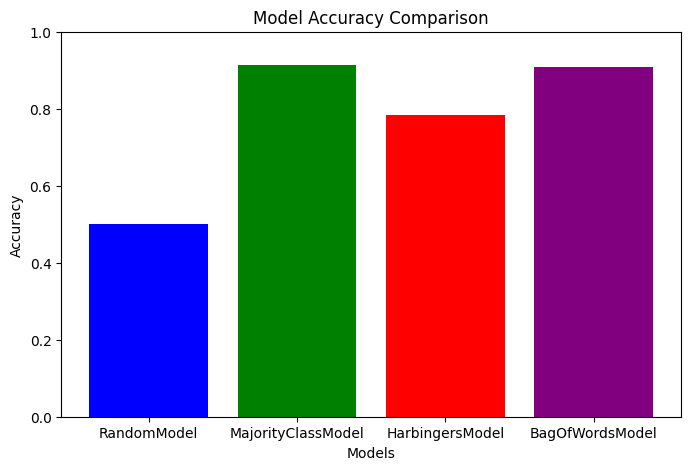

In [17]:
model_names = []
accuracies = []
for model in models:
    acc = evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test)
    model_names.append(model.__class__.__name__)
    accuracies.append(acc)
    print(f"Model: {model.__class__.__name__}, Accuracy: {acc:.4f}")

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

### Reciever Model

Filtering out NOANNOTATION values

In [18]:
def extract_messages_and_labels(data):
    X = []
    y = []
    for conv in data:
        for msg, label in zip(conv["messages"], conv["receiver_labels"]):
            if label != "NOANNOTATION":
                X.append(preprocess_text(msg))
                y.append(label)
    return X, y

In [19]:
X_train, y_train = extract_messages_and_labels(train_data)
X_val, y_val = extract_messages_and_labels(val_data)
X_test, y_test = extract_messages_and_labels(test_data)

In [22]:
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.train(X_train, y_train, X_val, y_val)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy:.4f}")

In [20]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate_model_f1(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.train(X_train, y_train, X_val, y_val)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f" Reciever Model: {model.__class__.__name__}, Accuracy: {accuracy:.4f}, Macro F1-score: {f1:.4f}")

    return accuracy, f1

In [23]:
models = [RandomModel(), MajorityClassModel(), HarbingersModel(), BagOfWordsModel()]
evaluate_model(RandomModel(), X_train, y_train, X_val, y_val, X_test, y_test)
evaluate_model(MajorityClassModel(), X_train, y_train, X_val, y_val, X_test, y_test)
evaluate_model(HarbingersModel(), X_train, y_train, X_val, y_val, X_test, y_test)
evaluate_model(BagOfWordsModel(), X_train, y_train, X_val, y_val, X_test, y_test)

Model: RandomModel, Accuracy: 0.5099
Model: MajorityClassModel, Accuracy: 0.9333
Model: HarbingersModel, Accuracy: 0.8057
Model: BagOfWordsModel, Accuracy: 0.9317


In [24]:
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.train(X_train, y_train, X_val, y_val)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

Model: RandomModel, Accuracy: 0.4974
Model: MajorityClassModel, Accuracy: 0.9333
Model: HarbingersModel, Accuracy: 0.8057
Model: BagOfWordsModel, Accuracy: 0.9317


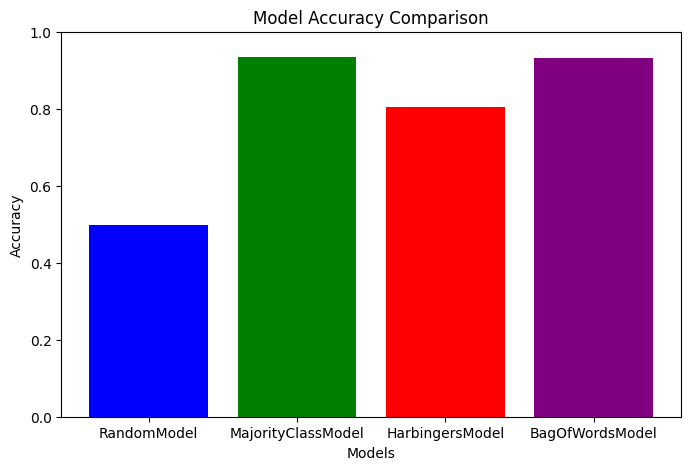

In [25]:
model_names = []
accuracies = []
for model in models:
    acc = evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test)
    model_names.append(model.__class__.__name__)
    accuracies.append(acc)
    print(f"Model: {model.__class__.__name__}, Accuracy: {acc:.4f}")

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()